In [1]:
from regain.datasets.hmm import generate_hmm
from regain.hmm.hmm_graphical_lasso import HMM_GraphicalLasso 
import numpy as np
from importlib import reload
import regain.hmm.utils; reload(regain.hmm.utils)
from regain.hmm.utils import results_recap
from regain.hmm.utils import cross_validation#,spread_pred_interpretation
from regain.hmm.utils_pred import Value_from_returns,thetas_comparison
import pickle as pkl
from notebooks.hmm.pred_func import pred_regression_methods
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

/Users/federicociech/.local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)
/Users/federicociech/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


In [6]:
N_samples = 2000
N_states = 5
N_TS = 5
sigma_Normal = 1

dataset = generate_hmm(n_samples= N_samples,
                       n_states=N_states,
                       n_dim_obs=N_TS,
                       mode_precisions='regain_random',
                       mode_mean = 'Normal',
                       transition_type='fixed',
                       sigma=sigma_Normal)
N_pred = 30

[2000.60726363 2009.71196066 2000.62359713 2001.87544036 2007.27327782]


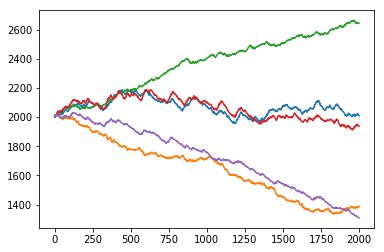

In [7]:
p_vec_0 = np.random.uniform(0,10,N_TS)+2000
Data = np.zeros((np.size(dataset['data'],axis=0),N_TS))
print(p_vec_0)
for j in range(N_TS):
    #print(p_vec_0[j])
    #print(np.cumsum(dataset['data'][:,j]))
    plt.plot(p_vec_0[j]+np.cumsum(dataset['data'][:,j]))
    Data[:,j] = p_vec_0[j]+np.cumsum(dataset['data'][:,j])
    
plt.show()

In [4]:
N_pred = 30

In [ ]:
from regain.hmm.utils_pred import reg_pred_HMM_GMM
ret_pred,_, Val_Pred =   reg_pred_HMM_GMM(dataset['data'],
                                   Data,
                                   np.linspace(0,35,5),
                                   [N_states],
                                   N_retrain = N_pred,
                                   N_val = 5,
                                   p=2,
                                   N_test = N_pred,
                                   meth = 'viterbi',
                                   pred_meth = 'rolling',
                                   recrossval = False,
                                   CV_meth = 'reg')



  0%|          | 0/5 [00:00<?, ?it/s]


  0%|          | 0/1 [00:00<?, ?it/s]

Prev 0 Var 0





100%|██████████| 1/1 [11:26<00:00, 686.38s/it]


 20%|██        | 1/5 [11:26<45:45, 686.38s/it]


  0%|          | 0/1 [00:00<?, ?it/s]


100%|██████████| 1/1 [11:31<00:00, 691.38s/it]


 40%|████      | 2/5 [22:57<34:23, 687.88s/it]


  0%|          | 0/1 [00:00<?, ?it/s]


100%|██████████| 1/1 [12:34<00:00, 754.89s/it]


 60%|██████    | 3/5 [35:32<23:35, 707.99s/it]


  0%|          | 0/1 [00:00<?, ?it/s]


100%|██████████| 1/1 [13:50<00:00, 830.02s/it]


 80%|████████  | 4/5 [49:22<12:24, 744.60s/it]


  0%|          | 0/1 [00:00<?, ?it/s]


100%|██████████| 1/1 [14:33<00:00, 873.32s/it]


100%|██████████| 5/5 [1:03:56<00:00, 767.20s/it]

(18.75, 5)
2.8543904635091235





  0%|          | 0/5 [00:00<?, ?it/s]


  0%|          | 0/1 [00:00<?, ?it/s]

MAE pred 0 Var 0 : 3.8961199422816595
Prev 0 Var 1





100%|██████████| 1/1 [31:33<00:00, 1893.36s/it]


 20%|██        | 1/5 [31:33<2:06:13, 1893.37s/it]


  0%|          | 0/1 [00:00<?, ?it/s]


100%|██████████| 1/1 [17:11<00:00, 1031.18s/it]


 40%|████      | 2/5 [48:44<1:21:44, 1634.71s/it]


  0%|          | 0/1 [00:00<?, ?it/s]


100%|██████████| 1/1 [15:18<00:00, 918.92s/it]


 60%|██████    | 3/5 [1:04:03<47:19, 1419.98s/it]


  0%|          | 0/1 [00:00<?, ?it/s]


100%|██████████| 1/1 [10:14<00:00, 614.09s/it]


 80%|████████  | 4/5 [1:14:17<19:38, 1178.21s/it]


  0%|          | 0/1 [00:00<?, ?it/s]


100%|██████████| 1/1 [07:41<00:00, 461.01s/it]


100%|██████████| 5/5 [1:21:58<00:00, 983.72s/it] 


(25.0, 5)
1.6457530527232644




  0%|          | 0/5 [00:00<?, ?it/s]


  0%|          | 0/1 [00:00<?, ?it/s]

MAE pred 0 Var 1 : 0.8981683561980696
Prev 0 Var 2





100%|██████████| 1/1 [12:42<00:00, 762.55s/it]


 20%|██        | 1/5 [12:42<50:50, 762.55s/it]


  0%|          | 0/1 [00:00<?, ?it/s]


100%|██████████| 1/1 [15:40<00:00, 940.35s/it]


 40%|████      | 2/5 [28:22<40:47, 815.89s/it]


  0%|          | 0/1 [00:00<?, ?it/s]


100%|██████████| 1/1 [11:21<00:00, 681.31s/it]


 60%|██████    | 3/5 [39:44<25:51, 775.52s/it]


  0%|          | 0/1 [00:00<?, ?it/s]


100%|██████████| 1/1 [11:55<00:00, 715.14s/it]


 80%|████████  | 4/5 [51:39<12:37, 757.41s/it]


  0%|          | 0/1 [00:00<?, ?it/s]


100%|██████████| 1/1 [13:22<00:00, 802.78s/it]


100%|██████████| 5/5 [1:05:02<00:00, 780.43s/it]

(18.75, 5)
1.7690049974566322





  0%|          | 0/5 [00:00<?, ?it/s]


  0%|          | 0/1 [00:00<?, ?it/s]

MAE pred 0 Var 2 : 0.37691453057586133
Prev 0 Var 3





100%|██████████| 1/1 [16:01<00:00, 961.70s/it]


 20%|██        | 1/5 [16:01<1:04:06, 961.70s/it]


  0%|          | 0/1 [00:00<?, ?it/s]


100%|██████████| 1/1 [11:10<00:00, 670.10s/it]


 40%|████      | 2/5 [27:11<43:42, 874.22s/it]  


  0%|          | 0/1 [00:00<?, ?it/s]


100%|██████████| 1/1 [11:24<00:00, 684.59s/it]


 60%|██████    | 3/5 [38:36<27:14, 817.33s/it]


  0%|          | 0/1 [00:00<?, ?it/s]


100%|██████████| 1/1 [11:21<00:00, 681.69s/it]


 80%|████████  | 4/5 [49:58<12:56, 776.64s/it]


  0%|          | 0/1 [00:00<?, ?it/s]


100%|██████████| 1/1 [11:09<00:00, 669.99s/it]


100%|██████████| 5/5 [1:01:08<00:00, 733.62s/it]

(0.0, 5)
2.3529306924135964





  0%|          | 0/5 [00:00<?, ?it/s]


  0%|          | 0/1 [00:00<?, ?it/s]

MAE pred 0 Var 3 : 5.11117259361329
Prev 0 Var 4


In [8]:
print(np.mean(abs(Val_Pred-Data[-N_pred:,:])))
print(Data[-N_pred:,:])
print(Val_Pred)
res_regre.append(Val_Pred)
methods.append('HHM_GGM')

1.796862161436637
[[1323.46024421 2599.43069076 1863.78357034 1333.44250758 2445.05006715]
 [1320.52751966 2596.04475187 1864.83259546 1335.42751941 2444.10427737]
 [1321.6672266  2600.51747472 1863.28880931 1334.30945463 2444.08572426]
 [1322.12410858 2602.67398955 1864.23038879 1332.68319269 2444.75076676]
 [1321.9035417  2603.15916637 1863.51249033 1329.67428736 2446.57082878]
 [1321.74574751 2604.62151491 1865.09271208 1329.90813279 2446.7969876 ]
 [1318.4949712  2607.36427836 1867.59424674 1325.46540141 2450.71742488]
 [1319.40215964 2612.11453789 1866.70573594 1326.63253887 2448.10248869]
 [1317.97266931 2614.80753902 1868.93763892 1322.66552385 2452.88981775]
 [1315.09591559 2615.22850161 1871.81199339 1317.70601563 2454.40850443]
 [1314.46333563 2617.10448085 1871.39873754 1315.98710927 2454.74257345]
 [1312.88285846 2619.51637771 1872.65175442 1312.04334148 2456.98464012]
 [1311.97905776 2619.91527024 1873.67645942 1310.9527108  2457.24683765]
 [1310.96466554 2622.20352757 187

[1]	valid_0's l1: 1.27623	valid_0's l2: 2.58569
Training until validation scores don't improve for 10 rounds
[2]	valid_0's l1: 1.25546	valid_0's l2: 2.51056
[3]	valid_0's l1: 1.2673	valid_0's l2: 2.572
[4]	valid_0's l1: 1.26562	valid_0's l2: 2.54442
[5]	valid_0's l1: 1.28971	valid_0's l2: 2.6259
[6]	valid_0's l1: 1.28283	valid_0's l2: 2.66136
[7]	valid_0's l1: 1.26792	valid_0's l2: 2.66258
[8]	valid_0's l1: 1.26005	valid_0's l2: 2.65639
[9]	valid_0's l1: 1.2663	valid_0's l2: 2.65277
[10]	valid_0's l1: 1.24648	valid_0's l2: 2.59338
[11]	valid_0's l1: 1.24713	valid_0's l2: 2.60608
[12]	valid_0's l1: 1.25557	valid_0's l2: 2.62002
Early stopping, best iteration is:
[2]	valid_0's l1: 1.25546	valid_0's l2: 2.51056
[1]	valid_0's l1: 2.1331	valid_0's l2: 6.65557
Training until validation scores don't improve for 10 rounds
[2]	valid_0's l1: 2.11515	valid_0's l2: 6.5696
[3]	valid_0's l1: 2.08676	valid_0's l2: 6.44544
[4]	valid_0's l1: 2.05464	valid_0's l2: 6.3816
[5]	valid_0's l1: 2.03174	valid_

[21]	valid_0's l1: 2.01746	valid_0's l2: 6.96641
[22]	valid_0's l1: 2.01934	valid_0's l2: 6.97047
[23]	valid_0's l1: 2.01805	valid_0's l2: 7.00212
[24]	valid_0's l1: 2.02458	valid_0's l2: 7.0027
[25]	valid_0's l1: 2.02498	valid_0's l2: 6.9677
[26]	valid_0's l1: 2.06051	valid_0's l2: 7.0545
[27]	valid_0's l1: 2.07918	valid_0's l2: 7.08973
[28]	valid_0's l1: 2.101	valid_0's l2: 7.17838
[29]	valid_0's l1: 2.12375	valid_0's l2: 7.2583
Early stopping, best iteration is:
[19]	valid_0's l1: 1.99246	valid_0's l2: 6.88262
[1]	valid_0's l1: 1.43843	valid_0's l2: 2.99785
Training until validation scores don't improve for 10 rounds
[2]	valid_0's l1: 1.43846	valid_0's l2: 3.04744
[3]	valid_0's l1: 1.4331	valid_0's l2: 3.05248
[4]	valid_0's l1: 1.44562	valid_0's l2: 3.13054
[5]	valid_0's l1: 1.44917	valid_0's l2: 3.14417
[6]	valid_0's l1: 1.45723	valid_0's l2: 3.17576
[7]	valid_0's l1: 1.45506	valid_0's l2: 3.18718
[8]	valid_0's l1: 1.46052	valid_0's l2: 3.23731
[9]	valid_0's l1: 1.45685	valid_0's l

[1]	valid_0's l1: 0.929661	valid_0's l2: 1.04233
Training until validation scores don't improve for 10 rounds
[2]	valid_0's l1: 0.905494	valid_0's l2: 1.01329
[3]	valid_0's l1: 0.902374	valid_0's l2: 1.02651
[4]	valid_0's l1: 0.891628	valid_0's l2: 1.00648
[5]	valid_0's l1: 0.891396	valid_0's l2: 1.02903
[6]	valid_0's l1: 0.873323	valid_0's l2: 0.998779
[7]	valid_0's l1: 0.867139	valid_0's l2: 1.00004
[8]	valid_0's l1: 0.868942	valid_0's l2: 1.03039
[9]	valid_0's l1: 0.852846	valid_0's l2: 1.00199
[10]	valid_0's l1: 0.851494	valid_0's l2: 1.02533
[11]	valid_0's l1: 0.874468	valid_0's l2: 1.07154
[12]	valid_0's l1: 0.870319	valid_0's l2: 1.07657
[13]	valid_0's l1: 0.868591	valid_0's l2: 1.08728
[14]	valid_0's l1: 0.862639	valid_0's l2: 1.09577
[15]	valid_0's l1: 0.841941	valid_0's l2: 1.07279
[16]	valid_0's l1: 0.852781	valid_0's l2: 1.13356
Early stopping, best iteration is:
[6]	valid_0's l1: 0.873323	valid_0's l2: 0.998779
[1]	valid_0's l1: 1.35802	valid_0's l2: 2.9186
Training until 

[14]	valid_0's l1: 1.00323	valid_0's l2: 1.83251
[15]	valid_0's l1: 0.977788	valid_0's l2: 1.78438
[16]	valid_0's l1: 0.978689	valid_0's l2: 1.84653
[17]	valid_0's l1: 0.976571	valid_0's l2: 1.82272
[18]	valid_0's l1: 0.964071	valid_0's l2: 1.80457
[19]	valid_0's l1: 0.958331	valid_0's l2: 1.8064
[20]	valid_0's l1: 0.950558	valid_0's l2: 1.80845
[21]	valid_0's l1: 0.939581	valid_0's l2: 1.82638
[22]	valid_0's l1: 0.947542	valid_0's l2: 1.85079
[23]	valid_0's l1: 0.937614	valid_0's l2: 1.85472
[24]	valid_0's l1: 0.94282	valid_0's l2: 1.87399
[25]	valid_0's l1: 0.956613	valid_0's l2: 1.91551
Early stopping, best iteration is:
[15]	valid_0's l1: 0.977788	valid_0's l2: 1.78438
[1]	valid_0's l1: 1.64012	valid_0's l2: 3.71298
Training until validation scores don't improve for 10 rounds
[2]	valid_0's l1: 1.62445	valid_0's l2: 3.61649
[3]	valid_0's l1: 1.62806	valid_0's l2: 3.63761
[4]	valid_0's l1: 1.62	valid_0's l2: 3.61728
[5]	valid_0's l1: 1.61274	valid_0's l2: 3.59841
[6]	valid_0's l1: 1.

[55]	valid_0's l1: 2.20878	valid_0's l2: 6.37702
[56]	valid_0's l1: 2.21266	valid_0's l2: 6.39204
[57]	valid_0's l1: 2.2126	valid_0's l2: 6.36698
[58]	valid_0's l1: 2.21253	valid_0's l2: 6.39511
[59]	valid_0's l1: 2.20493	valid_0's l2: 6.37391
[60]	valid_0's l1: 2.20177	valid_0's l2: 6.38816
[61]	valid_0's l1: 2.21041	valid_0's l2: 6.41913
[62]	valid_0's l1: 2.20333	valid_0's l2: 6.41751
[63]	valid_0's l1: 2.20167	valid_0's l2: 6.37476
[64]	valid_0's l1: 2.22942	valid_0's l2: 6.48882
Early stopping, best iteration is:
[54]	valid_0's l1: 2.2032	valid_0's l2: 6.33606
[1]	valid_0's l1: 1.76407	valid_0's l2: 3.87348
Training until validation scores don't improve for 10 rounds
[2]	valid_0's l1: 1.76596	valid_0's l2: 3.87303
[3]	valid_0's l1: 1.76845	valid_0's l2: 3.87217
[4]	valid_0's l1: 1.77463	valid_0's l2: 3.86958
[5]	valid_0's l1: 1.77109	valid_0's l2: 3.84671
[6]	valid_0's l1: 1.7778	valid_0's l2: 3.89677
[7]	valid_0's l1: 1.78352	valid_0's l2: 3.94298
[8]	valid_0's l1: 1.80063	valid_

[21]	valid_0's l1: 1.98249	valid_0's l2: 4.88568
[22]	valid_0's l1: 1.98141	valid_0's l2: 4.86935
[23]	valid_0's l1: 1.98082	valid_0's l2: 4.86229
[24]	valid_0's l1: 1.97848	valid_0's l2: 4.87165
Early stopping, best iteration is:
[14]	valid_0's l1: 1.95756	valid_0's l2: 4.94933
[1]	valid_0's l1: 1.56877	valid_0's l2: 4.57303
Training until validation scores don't improve for 10 rounds
[2]	valid_0's l1: 1.56716	valid_0's l2: 4.63371
[3]	valid_0's l1: 1.55746	valid_0's l2: 4.60385
[4]	valid_0's l1: 1.54909	valid_0's l2: 4.56434
[5]	valid_0's l1: 1.54214	valid_0's l2: 4.58067
[6]	valid_0's l1: 1.52997	valid_0's l2: 4.57376
[7]	valid_0's l1: 1.51702	valid_0's l2: 4.53589
[8]	valid_0's l1: 1.51008	valid_0's l2: 4.48149
[9]	valid_0's l1: 1.5087	valid_0's l2: 4.51465
[10]	valid_0's l1: 1.50174	valid_0's l2: 4.4682
[11]	valid_0's l1: 1.48714	valid_0's l2: 4.37651
[12]	valid_0's l1: 1.48422	valid_0's l2: 4.31598
[13]	valid_0's l1: 1.49039	valid_0's l2: 4.33264
[14]	valid_0's l1: 1.49582	valid_

[10]	valid_0's l1: 2.12288	valid_0's l2: 6.00512
[11]	valid_0's l1: 2.12956	valid_0's l2: 6.04352
[12]	valid_0's l1: 2.11988	valid_0's l2: 6.02566
[13]	valid_0's l1: 2.12174	valid_0's l2: 6.06036
[14]	valid_0's l1: 2.11595	valid_0's l2: 6.03644
[15]	valid_0's l1: 2.09912	valid_0's l2: 5.91739
[16]	valid_0's l1: 2.10413	valid_0's l2: 5.94354
[17]	valid_0's l1: 2.10478	valid_0's l2: 5.88674
[18]	valid_0's l1: 2.11359	valid_0's l2: 5.87186
[19]	valid_0's l1: 2.08785	valid_0's l2: 5.75994
[20]	valid_0's l1: 2.087	valid_0's l2: 5.72206
[21]	valid_0's l1: 2.0745	valid_0's l2: 5.683
[22]	valid_0's l1: 2.09314	valid_0's l2: 5.80625
[23]	valid_0's l1: 2.08135	valid_0's l2: 5.82036
[24]	valid_0's l1: 2.10464	valid_0's l2: 5.97126
[25]	valid_0's l1: 2.10501	valid_0's l2: 6.02335
[26]	valid_0's l1: 2.09871	valid_0's l2: 5.94859
[27]	valid_0's l1: 2.08315	valid_0's l2: 5.85002
[28]	valid_0's l1: 2.07468	valid_0's l2: 5.81889
[29]	valid_0's l1: 2.08142	valid_0's l2: 5.81221
[30]	valid_0's l1: 2.0842

[8]	valid_0's l1: 1.13469	valid_0's l2: 2.20771
[9]	valid_0's l1: 1.12375	valid_0's l2: 2.21391
[10]	valid_0's l1: 1.13127	valid_0's l2: 2.25839
[11]	valid_0's l1: 1.14181	valid_0's l2: 2.29354
[12]	valid_0's l1: 1.16858	valid_0's l2: 2.36349
[13]	valid_0's l1: 1.17127	valid_0's l2: 2.37148
[14]	valid_0's l1: 1.17715	valid_0's l2: 2.39234
[15]	valid_0's l1: 1.17199	valid_0's l2: 2.3895
Early stopping, best iteration is:
[5]	valid_0's l1: 1.13836	valid_0's l2: 2.16954
[1]	valid_0's l1: 1.66026	valid_0's l2: 4.12384
Training until validation scores don't improve for 10 rounds
[2]	valid_0's l1: 1.64035	valid_0's l2: 4.01564
[3]	valid_0's l1: 1.64717	valid_0's l2: 4.04241
[4]	valid_0's l1: 1.64239	valid_0's l2: 3.96085
[5]	valid_0's l1: 1.63737	valid_0's l2: 3.93574
[6]	valid_0's l1: 1.62569	valid_0's l2: 3.81549
[7]	valid_0's l1: 1.6162	valid_0's l2: 3.74289
[8]	valid_0's l1: 1.60073	valid_0's l2: 3.61891
[9]	valid_0's l1: 1.5955	valid_0's l2: 3.53941
[10]	valid_0's l1: 1.58608	valid_0's 

[56]	valid_0's l1: 1.42072	valid_0's l2: 3.0865
Early stopping, best iteration is:
[46]	valid_0's l1: 1.43489	valid_0's l2: 3.05908
[1]	valid_0's l1: 1.67501	valid_0's l2: 4.66893
Training until validation scores don't improve for 10 rounds
[2]	valid_0's l1: 1.66838	valid_0's l2: 4.5743
[3]	valid_0's l1: 1.66203	valid_0's l2: 4.48815
[4]	valid_0's l1: 1.65417	valid_0's l2: 4.43939
[5]	valid_0's l1: 1.65498	valid_0's l2: 4.42161
[6]	valid_0's l1: 1.62172	valid_0's l2: 4.33069
[7]	valid_0's l1: 1.60142	valid_0's l2: 4.19314
[8]	valid_0's l1: 1.58946	valid_0's l2: 4.15105
[9]	valid_0's l1: 1.59645	valid_0's l2: 4.1426
[10]	valid_0's l1: 1.59598	valid_0's l2: 4.16104
[11]	valid_0's l1: 1.61122	valid_0's l2: 4.18195
[12]	valid_0's l1: 1.60674	valid_0's l2: 4.12115
[13]	valid_0's l1: 1.60468	valid_0's l2: 4.10317
[14]	valid_0's l1: 1.61542	valid_0's l2: 4.08526
[15]	valid_0's l1: 1.64803	valid_0's l2: 4.23987
[16]	valid_0's l1: 1.64592	valid_0's l2: 4.15919
[17]	valid_0's l1: 1.64889	valid_0

[5]	valid_0's l1: 1.65706	valid_0's l2: 4.56944
[6]	valid_0's l1: 1.63799	valid_0's l2: 4.52766
[7]	valid_0's l1: 1.64006	valid_0's l2: 4.55672
[8]	valid_0's l1: 1.65249	valid_0's l2: 4.64532
[9]	valid_0's l1: 1.64501	valid_0's l2: 4.64278
[10]	valid_0's l1: 1.65888	valid_0's l2: 4.64968
[11]	valid_0's l1: 1.65735	valid_0's l2: 4.62791
[12]	valid_0's l1: 1.67557	valid_0's l2: 4.71768
[13]	valid_0's l1: 1.69086	valid_0's l2: 4.78609
[14]	valid_0's l1: 1.70325	valid_0's l2: 4.81188
[15]	valid_0's l1: 1.72822	valid_0's l2: 4.92486
[16]	valid_0's l1: 1.73559	valid_0's l2: 4.89507
Early stopping, best iteration is:
[6]	valid_0's l1: 1.63799	valid_0's l2: 4.52766
[1]	valid_0's l1: 1.48597	valid_0's l2: 3.62302
Training until validation scores don't improve for 10 rounds
[2]	valid_0's l1: 1.48328	valid_0's l2: 3.58311
[3]	valid_0's l1: 1.50957	valid_0's l2: 3.66702
[4]	valid_0's l1: 1.52318	valid_0's l2: 3.68452
[5]	valid_0's l1: 1.51712	valid_0's l2: 3.69352
[6]	valid_0's l1: 1.51106	valid_0

[10]	valid_0's l1: 1.60342	valid_0's l2: 3.49034
[11]	valid_0's l1: 1.60726	valid_0's l2: 3.50735
Early stopping, best iteration is:
[1]	valid_0's l1: 1.50507	valid_0's l2: 3.61682
[1]	valid_0's l1: 1.5117	valid_0's l2: 2.95161
Training until validation scores don't improve for 10 rounds
[2]	valid_0's l1: 1.51487	valid_0's l2: 2.94441
[3]	valid_0's l1: 1.51943	valid_0's l2: 2.95193
[4]	valid_0's l1: 1.51835	valid_0's l2: 2.93719
[5]	valid_0's l1: 1.50435	valid_0's l2: 2.86071
[6]	valid_0's l1: 1.51417	valid_0's l2: 2.89096
[7]	valid_0's l1: 1.48888	valid_0's l2: 2.81299
[8]	valid_0's l1: 1.48898	valid_0's l2: 2.8184
[9]	valid_0's l1: 1.49478	valid_0's l2: 2.84464
[10]	valid_0's l1: 1.49841	valid_0's l2: 2.88563
[11]	valid_0's l1: 1.48812	valid_0's l2: 2.85036
[12]	valid_0's l1: 1.4746	valid_0's l2: 2.82589
[13]	valid_0's l1: 1.45199	valid_0's l2: 2.7629
[14]	valid_0's l1: 1.44204	valid_0's l2: 2.75399
[15]	valid_0's l1: 1.44323	valid_0's l2: 2.78331
[16]	valid_0's l1: 1.44457	valid_0's

[1]	valid_0's l1: 1.98518	valid_0's l2: 6.83295
Training until validation scores don't improve for 10 rounds
[2]	valid_0's l1: 1.99056	valid_0's l2: 6.77642
[3]	valid_0's l1: 2.01608	valid_0's l2: 6.80172
[4]	valid_0's l1: 2.03371	valid_0's l2: 6.72673
[5]	valid_0's l1: 2.04494	valid_0's l2: 6.6673
[6]	valid_0's l1: 2.06356	valid_0's l2: 6.65494
[7]	valid_0's l1: 2.07153	valid_0's l2: 6.72825
[8]	valid_0's l1: 2.08466	valid_0's l2: 6.71671
[9]	valid_0's l1: 2.09573	valid_0's l2: 6.70201
[10]	valid_0's l1: 2.10504	valid_0's l2: 6.6269
[11]	valid_0's l1: 2.11869	valid_0's l2: 6.70096
Early stopping, best iteration is:
[1]	valid_0's l1: 1.98518	valid_0's l2: 6.83295
[1]	valid_0's l1: 1.67701	valid_0's l2: 3.65467
Training until validation scores don't improve for 10 rounds
[2]	valid_0's l1: 1.67731	valid_0's l2: 3.62864
[3]	valid_0's l1: 1.68235	valid_0's l2: 3.60275
[4]	valid_0's l1: 1.68286	valid_0's l2: 3.58183
[5]	valid_0's l1: 1.66537	valid_0's l2: 3.48246
[6]	valid_0's l1: 1.66549	v

[31]	valid_0's l1: 2.72711	valid_0's l2: 9.69502
[32]	valid_0's l1: 2.74414	valid_0's l2: 9.81434
[33]	valid_0's l1: 2.75826	valid_0's l2: 9.89373
[34]	valid_0's l1: 2.75955	valid_0's l2: 9.87702
[35]	valid_0's l1: 2.74797	valid_0's l2: 9.80328
[36]	valid_0's l1: 2.75043	valid_0's l2: 9.81961
[37]	valid_0's l1: 2.75039	valid_0's l2: 9.83654
[38]	valid_0's l1: 2.74454	valid_0's l2: 9.80904
[39]	valid_0's l1: 2.73969	valid_0's l2: 9.7671
Early stopping, best iteration is:
[29]	valid_0's l1: 2.71502	valid_0's l2: 9.6296
[1]	valid_0's l1: 2.63013	valid_0's l2: 8.82905
Training until validation scores don't improve for 10 rounds
[2]	valid_0's l1: 2.6217	valid_0's l2: 8.7859
[3]	valid_0's l1: 2.61972	valid_0's l2: 8.75862
[4]	valid_0's l1: 2.62701	valid_0's l2: 8.72556
[5]	valid_0's l1: 2.61898	valid_0's l2: 8.6812
[6]	valid_0's l1: 2.61652	valid_0's l2: 8.69209
[7]	valid_0's l1: 2.62481	valid_0's l2: 8.77109
[8]	valid_0's l1: 2.62128	valid_0's l2: 8.77033
[9]	valid_0's l1: 2.62434	valid_0's

[9]	valid_0's l1: 1.34622	valid_0's l2: 2.37715
[10]	valid_0's l1: 1.34108	valid_0's l2: 2.37577
[11]	valid_0's l1: 1.3477	valid_0's l2: 2.40586
Early stopping, best iteration is:
[1]	valid_0's l1: 1.27935	valid_0's l2: 2.21684
[1]	valid_0's l1: 2.1733	valid_0's l2: 5.87091
Training until validation scores don't improve for 10 rounds
[2]	valid_0's l1: 2.16422	valid_0's l2: 5.85901
[3]	valid_0's l1: 2.14073	valid_0's l2: 5.82584
[4]	valid_0's l1: 2.11701	valid_0's l2: 5.79498
[5]	valid_0's l1: 2.1132	valid_0's l2: 5.7992
[6]	valid_0's l1: 2.11825	valid_0's l2: 5.82578
[7]	valid_0's l1: 2.08704	valid_0's l2: 5.77465
[8]	valid_0's l1: 2.06468	valid_0's l2: 5.78826
[9]	valid_0's l1: 2.06866	valid_0's l2: 5.80602
[10]	valid_0's l1: 2.05216	valid_0's l2: 5.79956
[11]	valid_0's l1: 2.03241	valid_0's l2: 5.7496
[12]	valid_0's l1: 2.02316	valid_0's l2: 5.79115
[13]	valid_0's l1: 1.99187	valid_0's l2: 5.69892
[14]	valid_0's l1: 1.98383	valid_0's l2: 5.81684
[15]	valid_0's l1: 1.97531	valid_0's l

[11]	valid_0's l1: 1.506	valid_0's l2: 2.79177
Early stopping, best iteration is:
[1]	valid_0's l1: 1.45799	valid_0's l2: 2.69236
[1]	valid_0's l1: 2.48799	valid_0's l2: 7.56142
Training until validation scores don't improve for 10 rounds
[2]	valid_0's l1: 2.44774	valid_0's l2: 7.38725
[3]	valid_0's l1: 2.41367	valid_0's l2: 7.25847
[4]	valid_0's l1: 2.38082	valid_0's l2: 7.13226
[5]	valid_0's l1: 2.34288	valid_0's l2: 6.97619
[6]	valid_0's l1: 2.31843	valid_0's l2: 6.84698
[7]	valid_0's l1: 2.27799	valid_0's l2: 6.78233
[8]	valid_0's l1: 2.26891	valid_0's l2: 6.74013
[9]	valid_0's l1: 2.25301	valid_0's l2: 6.64169
[10]	valid_0's l1: 2.23247	valid_0's l2: 6.59541
[11]	valid_0's l1: 2.19393	valid_0's l2: 6.42683
[12]	valid_0's l1: 2.16846	valid_0's l2: 6.3933
[13]	valid_0's l1: 2.13682	valid_0's l2: 6.25837
[14]	valid_0's l1: 2.11379	valid_0's l2: 6.23999
[15]	valid_0's l1: 2.0945	valid_0's l2: 6.17748
[16]	valid_0's l1: 2.12208	valid_0's l2: 6.36246
[17]	valid_0's l1: 2.12383	valid_0's

[1]	valid_0's l1: 1.78602	valid_0's l2: 6.64295
Training until validation scores don't improve for 10 rounds
[2]	valid_0's l1: 1.80861	valid_0's l2: 6.64822
[3]	valid_0's l1: 1.83095	valid_0's l2: 6.68158
[4]	valid_0's l1: 1.86381	valid_0's l2: 6.66526
[5]	valid_0's l1: 1.8827	valid_0's l2: 6.62088
[6]	valid_0's l1: 1.89576	valid_0's l2: 6.60985
[7]	valid_0's l1: 1.91561	valid_0's l2: 6.71916
[8]	valid_0's l1: 1.94502	valid_0's l2: 6.76153
[9]	valid_0's l1: 1.95706	valid_0's l2: 6.75776
[10]	valid_0's l1: 1.97103	valid_0's l2: 6.68673
[11]	valid_0's l1: 1.98778	valid_0's l2: 6.75331
Early stopping, best iteration is:
[1]	valid_0's l1: 1.78602	valid_0's l2: 6.64295
[1]	valid_0's l1: 1.46545	valid_0's l2: 2.69608
Training until validation scores don't improve for 10 rounds
[2]	valid_0's l1: 1.46356	valid_0's l2: 2.66925
[3]	valid_0's l1: 1.47556	valid_0's l2: 2.70695
[4]	valid_0's l1: 1.47714	valid_0's l2: 2.69904
[5]	valid_0's l1: 1.47325	valid_0's l2: 2.65564
[6]	valid_0's l1: 1.4685	v

Epoch 46/50
 - 0s - loss: 1.4137 - val_loss: 1.2135
Epoch 47/50
 - 0s - loss: 1.4102 - val_loss: 1.2084
Epoch 48/50
 - 0s - loss: 1.4081 - val_loss: 1.2150
Epoch 49/50
 - 0s - loss: 1.4050 - val_loss: 1.2115
Epoch 50/50
 - 0s - loss: 1.4021 - val_loss: 1.2200
Train on 958 samples, validate on 10 samples
Epoch 1/50
 - 0s - loss: 2.1108 - val_loss: 2.3937
Epoch 2/50
 - 0s - loss: 2.0234 - val_loss: 2.2788
Epoch 3/50
 - 0s - loss: 1.9497 - val_loss: 2.1609
Epoch 4/50
 - 0s - loss: 1.8891 - val_loss: 2.0405
Epoch 5/50
 - 0s - loss: 1.8421 - val_loss: 1.9322
Epoch 6/50
 - 0s - loss: 1.8148 - val_loss: 1.9183
Epoch 7/50
 - 0s - loss: 1.8021 - val_loss: 1.9021
Epoch 8/50
 - 0s - loss: 1.7905 - val_loss: 1.8797
Epoch 9/50
 - 0s - loss: 1.7796 - val_loss: 1.8592
Epoch 10/50
 - 0s - loss: 1.7705 - val_loss: 1.8466
Epoch 11/50
 - 0s - loss: 1.7640 - val_loss: 1.8368
Epoch 12/50
 - 0s - loss: 1.7594 - val_loss: 1.8329
Epoch 13/50
 - 0s - loss: 1.7547 - val_loss: 1.8260
Epoch 14/50
 - 0s - loss: 1.

 - 0s - loss: 1.5718 - val_loss: 0.8950
Epoch 2/50
 - 0s - loss: 1.5445 - val_loss: 0.9126
Epoch 3/50
 - 0s - loss: 1.5265 - val_loss: 0.9269
Epoch 4/50
 - 0s - loss: 1.5122 - val_loss: 0.9424
Epoch 5/50
 - 0s - loss: 1.4992 - val_loss: 0.9525
Epoch 6/50
 - 0s - loss: 1.4882 - val_loss: 0.9588
Epoch 7/50
 - 0s - loss: 1.4778 - val_loss: 0.9658
Epoch 8/50
 - 0s - loss: 1.4685 - val_loss: 0.9670
Epoch 9/50
 - 0s - loss: 1.4608 - val_loss: 0.9616
Epoch 10/50
 - 0s - loss: 1.4541 - val_loss: 0.9574
Epoch 11/50
 - 0s - loss: 1.4479 - val_loss: 0.9556
Epoch 12/50
 - 0s - loss: 1.4423 - val_loss: 0.9525
Epoch 13/50
 - 0s - loss: 1.4373 - val_loss: 0.9438
Epoch 14/50
 - 0s - loss: 1.4326 - val_loss: 0.9345
Epoch 15/50
 - 0s - loss: 1.4283 - val_loss: 0.9256
Epoch 16/50
 - 0s - loss: 1.4243 - val_loss: 0.9216
Epoch 17/50
 - 0s - loss: 1.4202 - val_loss: 0.9150
Epoch 18/50
 - 0s - loss: 1.4164 - val_loss: 0.9092
Epoch 19/50
 - 0s - loss: 1.4125 - val_loss: 0.9079
Epoch 20/50
 - 0s - loss: 1.4086

Epoch 7/50
 - 0s - loss: 1.4809 - val_loss: 1.3968
Epoch 8/50
 - 0s - loss: 1.4776 - val_loss: 1.3999
Epoch 9/50
 - 0s - loss: 1.4746 - val_loss: 1.4020
Epoch 10/50
 - 0s - loss: 1.4714 - val_loss: 1.4038
Epoch 11/50
 - 0s - loss: 1.4683 - val_loss: 1.4092
Epoch 12/50
 - 0s - loss: 1.4651 - val_loss: 1.4159
Epoch 13/50
 - 0s - loss: 1.4621 - val_loss: 1.4220
Epoch 14/50
 - 0s - loss: 1.4595 - val_loss: 1.4232
Epoch 15/50
 - 0s - loss: 1.4568 - val_loss: 1.4250
Epoch 16/50
 - 0s - loss: 1.4544 - val_loss: 1.4275
Epoch 17/50
 - 0s - loss: 1.4518 - val_loss: 1.4306
Epoch 18/50
 - 0s - loss: 1.4490 - val_loss: 1.4329
Epoch 19/50
 - 0s - loss: 1.4464 - val_loss: 1.4344
Epoch 20/50
 - 0s - loss: 1.4440 - val_loss: 1.4375
Epoch 21/50
 - 0s - loss: 1.4419 - val_loss: 1.4497
Epoch 22/50
 - 0s - loss: 1.4397 - val_loss: 1.4494
Epoch 23/50
 - 0s - loss: 1.4375 - val_loss: 1.4506
Epoch 24/50
 - 0s - loss: 1.4358 - val_loss: 1.4576
Epoch 25/50
 - 0s - loss: 1.4337 - val_loss: 1.4593
Epoch 26/50
 - 

Epoch 13/50
 - 0s - loss: 1.4927 - val_loss: 1.2316
Epoch 14/50
 - 0s - loss: 1.4903 - val_loss: 1.2230
Epoch 15/50
 - 0s - loss: 1.4878 - val_loss: 1.2144
Epoch 16/50
 - 0s - loss: 1.4856 - val_loss: 1.2074
Epoch 17/50
 - 0s - loss: 1.4833 - val_loss: 1.2038
Epoch 18/50
 - 0s - loss: 1.4807 - val_loss: 1.1969
Epoch 19/50
 - 0s - loss: 1.4783 - val_loss: 1.1911
Epoch 20/50
 - 0s - loss: 1.4765 - val_loss: 1.1890
Epoch 21/50
 - 0s - loss: 1.4742 - val_loss: 1.1843
Epoch 22/50
 - 0s - loss: 1.4722 - val_loss: 1.1802
Epoch 23/50
 - 0s - loss: 1.4702 - val_loss: 1.1808
Epoch 24/50
 - 0s - loss: 1.4679 - val_loss: 1.1789
Epoch 25/50
 - 0s - loss: 1.4657 - val_loss: 1.1778
Epoch 26/50
 - 0s - loss: 1.4636 - val_loss: 1.1775
Epoch 27/50
 - 0s - loss: 1.4613 - val_loss: 1.1793
Epoch 28/50
 - 0s - loss: 1.4591 - val_loss: 1.1816
Epoch 29/50
 - 0s - loss: 1.4569 - val_loss: 1.1796
Epoch 30/50
 - 0s - loss: 1.4543 - val_loss: 1.1699
Epoch 31/50
 - 0s - loss: 1.4524 - val_loss: 1.1747
Epoch 32/50


Epoch 19/50
 - 0s - loss: 1.7314 - val_loss: 1.7559
Epoch 20/50
 - 0s - loss: 1.7283 - val_loss: 1.7574
Epoch 21/50
 - 0s - loss: 1.7255 - val_loss: 1.7627
Epoch 22/50
 - 0s - loss: 1.7223 - val_loss: 1.7654
Epoch 23/50
 - 0s - loss: 1.7191 - val_loss: 1.7673
Epoch 24/50
 - 0s - loss: 1.7167 - val_loss: 1.7700
Epoch 25/50
 - 0s - loss: 1.7135 - val_loss: 1.7674
Epoch 26/50
 - 0s - loss: 1.7108 - val_loss: 1.7757
Epoch 27/50
 - 0s - loss: 1.7079 - val_loss: 1.7730
Epoch 28/50
 - 0s - loss: 1.7052 - val_loss: 1.7762
Epoch 29/50
 - 0s - loss: 1.7024 - val_loss: 1.7728
Epoch 30/50
 - 0s - loss: 1.6995 - val_loss: 1.7745
Epoch 31/50
 - 0s - loss: 1.6971 - val_loss: 1.7788
Epoch 32/50
 - 0s - loss: 1.6941 - val_loss: 1.7715
Epoch 33/50
 - 0s - loss: 1.6921 - val_loss: 1.7759
Epoch 34/50
 - 0s - loss: 1.6890 - val_loss: 1.7693
Epoch 35/50
 - 0s - loss: 1.6864 - val_loss: 1.7741
Epoch 36/50
 - 0s - loss: 1.6840 - val_loss: 1.7735
Epoch 37/50
 - 0s - loss: 1.6805 - val_loss: 1.7650
Epoch 38/50


Epoch 25/50
 - 0s - loss: 1.7089 - val_loss: 2.6573
Epoch 26/50
 - 0s - loss: 1.7058 - val_loss: 2.6638
Epoch 27/50
 - 0s - loss: 1.7027 - val_loss: 2.6702
Epoch 28/50
 - 0s - loss: 1.6991 - val_loss: 2.6681
Epoch 29/50
 - 0s - loss: 1.6961 - val_loss: 2.6765
Epoch 30/50
 - 0s - loss: 1.6925 - val_loss: 2.6759
Epoch 31/50
 - 0s - loss: 1.6894 - val_loss: 2.6800
Epoch 32/50
 - 0s - loss: 1.6862 - val_loss: 2.6859
Epoch 33/50
 - 0s - loss: 1.6825 - val_loss: 2.6843
Epoch 34/50
 - 0s - loss: 1.6794 - val_loss: 2.6928
Epoch 35/50
 - 0s - loss: 1.6764 - val_loss: 2.6939
Epoch 36/50
 - 0s - loss: 1.6731 - val_loss: 2.6966
Epoch 37/50
 - 0s - loss: 1.6699 - val_loss: 2.7014
Epoch 38/50
 - 0s - loss: 1.6659 - val_loss: 2.7045
Epoch 39/50
 - 0s - loss: 1.6632 - val_loss: 2.7131
Epoch 40/50
 - 0s - loss: 1.6599 - val_loss: 2.7159
Epoch 41/50
 - 0s - loss: 1.6568 - val_loss: 2.7184
Epoch 42/50
 - 0s - loss: 1.6530 - val_loss: 2.7190
Epoch 43/50
 - 0s - loss: 1.6499 - val_loss: 2.7242
Epoch 44/50


Epoch 31/50
 - 0s - loss: 1.3791 - val_loss: 0.9692
Epoch 32/50
 - 0s - loss: 1.3766 - val_loss: 0.9647
Epoch 33/50
 - 0s - loss: 1.3736 - val_loss: 0.9734
Epoch 34/50
 - 0s - loss: 1.3708 - val_loss: 0.9674
Epoch 35/50
 - 0s - loss: 1.3680 - val_loss: 0.9732
Epoch 36/50
 - 0s - loss: 1.3650 - val_loss: 0.9716
Epoch 37/50
 - 0s - loss: 1.3625 - val_loss: 0.9740
Epoch 38/50
 - 0s - loss: 1.3595 - val_loss: 0.9681
Epoch 39/50
 - 0s - loss: 1.3564 - val_loss: 0.9710
Epoch 40/50
 - 0s - loss: 1.3540 - val_loss: 0.9810
Epoch 41/50
 - 0s - loss: 1.3507 - val_loss: 0.9655
Epoch 42/50
 - 0s - loss: 1.3488 - val_loss: 0.9721
Epoch 43/50
 - 0s - loss: 1.3457 - val_loss: 0.9764
Epoch 44/50
 - 0s - loss: 1.3424 - val_loss: 0.9700
Epoch 45/50
 - 0s - loss: 1.3402 - val_loss: 0.9761
Epoch 46/50
 - 0s - loss: 1.3369 - val_loss: 0.9723
Epoch 47/50
 - 0s - loss: 1.3342 - val_loss: 0.9789
Epoch 48/50
 - 0s - loss: 1.3314 - val_loss: 0.9769
Epoch 49/50
 - 0s - loss: 1.3291 - val_loss: 0.9748
Epoch 50/50


Epoch 37/50
 - 0s - loss: 1.4032 - val_loss: 1.6488
Epoch 38/50
 - 0s - loss: 1.4011 - val_loss: 1.6442
Epoch 39/50
 - 0s - loss: 1.3992 - val_loss: 1.6560
Epoch 40/50
 - 0s - loss: 1.3972 - val_loss: 1.6477
Epoch 41/50
 - 0s - loss: 1.3943 - val_loss: 1.6473
Epoch 42/50
 - 0s - loss: 1.3926 - val_loss: 1.6486
Epoch 43/50
 - 0s - loss: 1.3902 - val_loss: 1.6401
Epoch 44/50
 - 0s - loss: 1.3883 - val_loss: 1.6550
Epoch 45/50
 - 0s - loss: 1.3861 - val_loss: 1.6509
Epoch 46/50
 - 0s - loss: 1.3830 - val_loss: 1.6453
Epoch 47/50
 - 0s - loss: 1.3812 - val_loss: 1.6502
Epoch 48/50
 - 0s - loss: 1.3784 - val_loss: 1.6526
Epoch 49/50
 - 0s - loss: 1.3763 - val_loss: 1.6529
Epoch 50/50
 - 0s - loss: 1.3738 - val_loss: 1.6501
Train on 962 samples, validate on 10 samples
Epoch 1/50
 - 0s - loss: 1.9890 - val_loss: 1.7189
Epoch 2/50
 - 0s - loss: 1.9288 - val_loss: 1.7165
Epoch 3/50
 - 0s - loss: 1.8847 - val_loss: 1.7556
Epoch 4/50
 - 0s - loss: 1.8529 - val_loss: 1.8016
Epoch 5/50
 - 0s - loss

Epoch 43/50
 - 0s - loss: 1.4207 - val_loss: 1.2686
Epoch 44/50
 - 0s - loss: 1.4176 - val_loss: 1.2522
Epoch 45/50
 - 0s - loss: 1.4154 - val_loss: 1.2698
Epoch 46/50
 - 0s - loss: 1.4125 - val_loss: 1.2543
Epoch 47/50
 - 0s - loss: 1.4101 - val_loss: 1.2619
Epoch 48/50
 - 0s - loss: 1.4072 - val_loss: 1.2657
Epoch 49/50
 - 0s - loss: 1.4046 - val_loss: 1.2596
Epoch 50/50
 - 0s - loss: 1.4022 - val_loss: 1.2628
Train on 963 samples, validate on 10 samples
Epoch 1/50
 - 0s - loss: 2.0526 - val_loss: 2.3170
Epoch 2/50
 - 0s - loss: 1.9692 - val_loss: 2.3839
Epoch 3/50
 - 0s - loss: 1.9007 - val_loss: 2.4668
Epoch 4/50
 - 0s - loss: 1.8474 - val_loss: 2.5884
Epoch 5/50
 - 0s - loss: 1.8209 - val_loss: 2.6744
Epoch 6/50
 - 0s - loss: 1.8057 - val_loss: 2.7227
Epoch 7/50
 - 0s - loss: 1.7925 - val_loss: 2.7530
Epoch 8/50
 - 0s - loss: 1.7813 - val_loss: 2.7759
Epoch 9/50
 - 0s - loss: 1.7714 - val_loss: 2.8005
Epoch 10/50
 - 0s - loss: 1.7619 - val_loss: 2.8265
Epoch 11/50
 - 0s - loss: 1.

Epoch 49/50
 - 0s - loss: 1.6369 - val_loss: 1.9498
Epoch 50/50
 - 0s - loss: 1.6340 - val_loss: 1.9387
Train on 963 samples, validate on 10 samples
Epoch 1/50
 - 0s - loss: 1.5950 - val_loss: 0.8556
Epoch 2/50
 - 0s - loss: 1.5593 - val_loss: 0.8618
Epoch 3/50
 - 0s - loss: 1.5345 - val_loss: 0.8610
Epoch 4/50
 - 0s - loss: 1.5156 - val_loss: 0.8690
Epoch 5/50
 - 0s - loss: 1.5007 - val_loss: 0.8740
Epoch 6/50
 - 0s - loss: 1.4886 - val_loss: 0.8756
Epoch 7/50
 - 0s - loss: 1.4778 - val_loss: 0.8783
Epoch 8/50
 - 0s - loss: 1.4677 - val_loss: 0.8839
Epoch 9/50
 - 0s - loss: 1.4596 - val_loss: 0.8899
Epoch 10/50
 - 0s - loss: 1.4520 - val_loss: 0.8957
Epoch 11/50
 - 0s - loss: 1.4454 - val_loss: 0.9032
Epoch 12/50
 - 0s - loss: 1.4396 - val_loss: 0.9053
Epoch 13/50
 - 0s - loss: 1.4350 - val_loss: 0.9042
Epoch 14/50
 - 0s - loss: 1.4304 - val_loss: 0.9076
Epoch 15/50
 - 0s - loss: 1.4258 - val_loss: 0.9127
Epoch 16/50
 - 0s - loss: 1.4216 - val_loss: 0.9228
Epoch 17/50
 - 0s - loss: 1.

Epoch 4/50
 - 0s - loss: 1.4842 - val_loss: 1.6611
Epoch 5/50
 - 0s - loss: 1.4791 - val_loss: 1.6636
Epoch 6/50
 - 0s - loss: 1.4741 - val_loss: 1.6682
Epoch 7/50
 - 0s - loss: 1.4698 - val_loss: 1.6740
Epoch 8/50
 - 0s - loss: 1.4660 - val_loss: 1.6819
Epoch 9/50
 - 0s - loss: 1.4625 - val_loss: 1.6860
Epoch 10/50
 - 0s - loss: 1.4594 - val_loss: 1.6920
Epoch 11/50
 - 0s - loss: 1.4563 - val_loss: 1.6969
Epoch 12/50
 - 0s - loss: 1.4535 - val_loss: 1.6971
Epoch 13/50
 - 0s - loss: 1.4508 - val_loss: 1.6928
Epoch 14/50
 - 0s - loss: 1.4483 - val_loss: 1.6900
Epoch 15/50
 - 0s - loss: 1.4460 - val_loss: 1.6909
Epoch 16/50
 - 0s - loss: 1.4436 - val_loss: 1.6918
Epoch 17/50
 - 0s - loss: 1.4414 - val_loss: 1.6897
Epoch 18/50
 - 0s - loss: 1.4393 - val_loss: 1.6907
Epoch 19/50
 - 0s - loss: 1.4373 - val_loss: 1.6867
Epoch 20/50
 - 0s - loss: 1.4356 - val_loss: 1.6832
Epoch 21/50
 - 0s - loss: 1.4337 - val_loss: 1.6883
Epoch 22/50
 - 0s - loss: 1.4319 - val_loss: 1.6964
Epoch 23/50
 - 0s 

Epoch 10/50
 - 0s - loss: 1.4973 - val_loss: 1.5683
Epoch 11/50
 - 0s - loss: 1.4940 - val_loss: 1.5607
Epoch 12/50
 - 0s - loss: 1.4910 - val_loss: 1.5537
Epoch 13/50
 - 0s - loss: 1.4881 - val_loss: 1.5463
Epoch 14/50
 - 0s - loss: 1.4856 - val_loss: 1.5390
Epoch 15/50
 - 0s - loss: 1.4830 - val_loss: 1.5324
Epoch 16/50
 - 0s - loss: 1.4806 - val_loss: 1.5270
Epoch 17/50
 - 0s - loss: 1.4784 - val_loss: 1.5237
Epoch 18/50
 - 0s - loss: 1.4760 - val_loss: 1.5232
Epoch 19/50
 - 0s - loss: 1.4739 - val_loss: 1.5241
Epoch 20/50
 - 0s - loss: 1.4719 - val_loss: 1.5255
Epoch 21/50
 - 0s - loss: 1.4697 - val_loss: 1.5261
Epoch 22/50
 - 0s - loss: 1.4676 - val_loss: 1.5255
Epoch 23/50
 - 0s - loss: 1.4654 - val_loss: 1.5207
Epoch 24/50
 - 0s - loss: 1.4636 - val_loss: 1.5187
Epoch 25/50
 - 0s - loss: 1.4612 - val_loss: 1.5163
Epoch 26/50
 - 0s - loss: 1.4590 - val_loss: 1.5108
Epoch 27/50
 - 0s - loss: 1.4571 - val_loss: 1.5113
Epoch 28/50
 - 0s - loss: 1.4546 - val_loss: 1.5076
Epoch 29/50


Epoch 16/50
 - 0s - loss: 1.7511 - val_loss: 1.5669
Epoch 17/50
 - 0s - loss: 1.7471 - val_loss: 1.5681
Epoch 18/50
 - 0s - loss: 1.7432 - val_loss: 1.5724
Epoch 19/50
 - 0s - loss: 1.7394 - val_loss: 1.5786
Epoch 20/50
 - 0s - loss: 1.7357 - val_loss: 1.5865
Epoch 21/50
 - 0s - loss: 1.7318 - val_loss: 1.5988
Epoch 22/50
 - 0s - loss: 1.7279 - val_loss: 1.6093
Epoch 23/50
 - 0s - loss: 1.7243 - val_loss: 1.6196
Epoch 24/50
 - 0s - loss: 1.7206 - val_loss: 1.6310
Epoch 25/50
 - 0s - loss: 1.7177 - val_loss: 1.6378
Epoch 26/50
 - 0s - loss: 1.7146 - val_loss: 1.6451
Epoch 27/50
 - 0s - loss: 1.7116 - val_loss: 1.6496
Epoch 28/50
 - 0s - loss: 1.7083 - val_loss: 1.6527
Epoch 29/50
 - 0s - loss: 1.7054 - val_loss: 1.6550
Epoch 30/50
 - 0s - loss: 1.7023 - val_loss: 1.6586
Epoch 31/50
 - 0s - loss: 1.6990 - val_loss: 1.6576
Epoch 32/50
 - 0s - loss: 1.6963 - val_loss: 1.6561
Epoch 33/50
 - 0s - loss: 1.6935 - val_loss: 1.6556
Epoch 34/50
 - 0s - loss: 1.6906 - val_loss: 1.6573
Epoch 35/50


Epoch 22/50
 - 0s - loss: 1.7324 - val_loss: 2.2840
Epoch 23/50
 - 0s - loss: 1.7296 - val_loss: 2.2859
Epoch 24/50
 - 0s - loss: 1.7264 - val_loss: 2.2854
Epoch 25/50
 - 0s - loss: 1.7237 - val_loss: 2.2876
Epoch 26/50
 - 0s - loss: 1.7207 - val_loss: 2.2887
Epoch 27/50
 - 0s - loss: 1.7178 - val_loss: 2.2944
Epoch 28/50
 - 0s - loss: 1.7145 - val_loss: 2.2957
Epoch 29/50
 - 0s - loss: 1.7119 - val_loss: 2.3004
Epoch 30/50
 - 0s - loss: 1.7086 - val_loss: 2.2991
Epoch 31/50
 - 0s - loss: 1.7054 - val_loss: 2.3039
Epoch 32/50
 - 0s - loss: 1.7022 - val_loss: 2.3054
Epoch 33/50
 - 0s - loss: 1.6991 - val_loss: 2.3087
Epoch 34/50
 - 0s - loss: 1.6956 - val_loss: 2.3103
Epoch 35/50
 - 0s - loss: 1.6923 - val_loss: 2.3100
Epoch 36/50
 - 0s - loss: 1.6893 - val_loss: 2.3154
Epoch 37/50
 - 0s - loss: 1.6857 - val_loss: 2.3134
Epoch 38/50
 - 0s - loss: 1.6821 - val_loss: 2.3130
Epoch 39/50
 - 0s - loss: 1.6793 - val_loss: 2.3146
Epoch 40/50
 - 0s - loss: 1.6760 - val_loss: 2.3148
Epoch 41/50


Epoch 28/50
 - 0s - loss: 1.3804 - val_loss: 1.2144
Epoch 29/50
 - 0s - loss: 1.3779 - val_loss: 1.2220
Epoch 30/50
 - 0s - loss: 1.3749 - val_loss: 1.2212
Epoch 31/50
 - 0s - loss: 1.3723 - val_loss: 1.2206
Epoch 32/50
 - 0s - loss: 1.3692 - val_loss: 1.2210
Epoch 33/50
 - 0s - loss: 1.3669 - val_loss: 1.2267
Epoch 34/50
 - 0s - loss: 1.3639 - val_loss: 1.2337
Epoch 35/50
 - 0s - loss: 1.3611 - val_loss: 1.2342
Epoch 36/50
 - 0s - loss: 1.3581 - val_loss: 1.2355
Epoch 37/50
 - 0s - loss: 1.3551 - val_loss: 1.2423
Epoch 38/50
 - 0s - loss: 1.3524 - val_loss: 1.2396
Epoch 39/50
 - 0s - loss: 1.3498 - val_loss: 1.2429
Epoch 40/50
 - 0s - loss: 1.3470 - val_loss: 1.2433
Epoch 41/50
 - 0s - loss: 1.3444 - val_loss: 1.2410
Epoch 42/50
 - 0s - loss: 1.3414 - val_loss: 1.2452
Epoch 43/50
 - 0s - loss: 1.3390 - val_loss: 1.2384
Epoch 44/50
 - 0s - loss: 1.3363 - val_loss: 1.2442
Epoch 45/50
 - 0s - loss: 1.3332 - val_loss: 1.2503
Epoch 46/50
 - 0s - loss: 1.3301 - val_loss: 1.2469
Epoch 47/50


Epoch 34/50
 - 0s - loss: 1.4031 - val_loss: 1.8465
Epoch 35/50
 - 0s - loss: 1.4009 - val_loss: 1.8483
Epoch 36/50
 - 0s - loss: 1.3985 - val_loss: 1.8478
Epoch 37/50
 - 0s - loss: 1.3956 - val_loss: 1.8419
Epoch 38/50
 - 0s - loss: 1.3934 - val_loss: 1.8457
Epoch 39/50
 - 0s - loss: 1.3907 - val_loss: 1.8362
Epoch 40/50
 - 0s - loss: 1.3889 - val_loss: 1.8479
Epoch 41/50
 - 0s - loss: 1.3863 - val_loss: 1.8297
Epoch 42/50
 - 0s - loss: 1.3838 - val_loss: 1.8292
Epoch 43/50
 - 0s - loss: 1.3814 - val_loss: 1.8234
Epoch 44/50
 - 0s - loss: 1.3792 - val_loss: 1.8239
Epoch 45/50
 - 0s - loss: 1.3771 - val_loss: 1.8192
Epoch 46/50
 - 0s - loss: 1.3743 - val_loss: 1.8157
Epoch 47/50
 - 0s - loss: 1.3724 - val_loss: 1.8091
Epoch 48/50
 - 0s - loss: 1.3693 - val_loss: 1.8187
Epoch 49/50
 - 0s - loss: 1.3676 - val_loss: 1.8059
Epoch 50/50
 - 0s - loss: 1.3643 - val_loss: 1.8074
Train on 967 samples, validate on 10 samples
Epoch 1/50
 - 0s - loss: 1.9864 - val_loss: 1.9024
Epoch 2/50
 - 0s - l

Epoch 40/50
 - 0s - loss: 1.4189 - val_loss: 1.2171
Epoch 41/50
 - 0s - loss: 1.4162 - val_loss: 1.2176
Epoch 42/50
 - 0s - loss: 1.4133 - val_loss: 1.2195
Epoch 43/50
 - 0s - loss: 1.4105 - val_loss: 1.2308
Epoch 44/50
 - 0s - loss: 1.4077 - val_loss: 1.2305
Epoch 45/50
 - 0s - loss: 1.4047 - val_loss: 1.2296
Epoch 46/50
 - 0s - loss: 1.4025 - val_loss: 1.2326
Epoch 47/50
 - 0s - loss: 1.3995 - val_loss: 1.2346
Epoch 48/50
 - 0s - loss: 1.3968 - val_loss: 1.2382
Epoch 49/50
 - 0s - loss: 1.3940 - val_loss: 1.2410
Epoch 50/50
 - 0s - loss: 1.3914 - val_loss: 1.2448
Train on 968 samples, validate on 10 samples
Epoch 1/50
 - 0s - loss: 2.1404 - val_loss: 2.3990
Epoch 2/50
 - 0s - loss: 2.0457 - val_loss: 2.2269
Epoch 3/50
 - 0s - loss: 1.9650 - val_loss: 2.1426
Epoch 4/50
 - 0s - loss: 1.8992 - val_loss: 2.1098
Epoch 5/50
 - 0s - loss: 1.8519 - val_loss: 2.0798
Epoch 6/50
 - 0s - loss: 1.8220 - val_loss: 2.0652
Epoch 7/50
 - 0s - loss: 1.8043 - val_loss: 2.0724
Epoch 8/50
 - 0s - loss: 1

Epoch 46/50
 - 0s - loss: 1.6486 - val_loss: 1.9565
Epoch 47/50
 - 0s - loss: 1.6459 - val_loss: 1.9550
Epoch 48/50
 - 0s - loss: 1.6424 - val_loss: 1.9461
Epoch 49/50
 - 0s - loss: 1.6391 - val_loss: 1.9464
Epoch 50/50
 - 0s - loss: 1.6356 - val_loss: 1.9538
Train on 968 samples, validate on 10 samples
Epoch 1/50
 - 0s - loss: 1.5841 - val_loss: 1.5629
Epoch 2/50
 - 0s - loss: 1.5435 - val_loss: 1.5141
Epoch 3/50
 - 0s - loss: 1.5184 - val_loss: 1.4988
Epoch 4/50
 - 0s - loss: 1.5009 - val_loss: 1.4913
Epoch 5/50
 - 0s - loss: 1.4879 - val_loss: 1.4839
Epoch 6/50
 - 0s - loss: 1.4769 - val_loss: 1.4780
Epoch 7/50
 - 0s - loss: 1.4681 - val_loss: 1.4794
Epoch 8/50
 - 0s - loss: 1.4601 - val_loss: 1.4776
Epoch 9/50
 - 0s - loss: 1.4528 - val_loss: 1.4770
Epoch 10/50
 - 0s - loss: 1.4464 - val_loss: 1.4753
Epoch 11/50
 - 0s - loss: 1.4405 - val_loss: 1.4751
Epoch 12/50
 - 0s - loss: 1.4351 - val_loss: 1.4780
Epoch 13/50
 - 0s - loss: 1.4307 - val_loss: 1.4797
Epoch 14/50
 - 0s - loss: 1.

 - 0s - loss: 1.5086 - val_loss: 1.4593
Epoch 2/50
 - 0s - loss: 1.4967 - val_loss: 1.4644
Epoch 3/50
 - 0s - loss: 1.4895 - val_loss: 1.4734
Epoch 4/50
 - 0s - loss: 1.4843 - val_loss: 1.4790
Epoch 5/50
 - 0s - loss: 1.4800 - val_loss: 1.4820
Epoch 6/50
 - 0s - loss: 1.4761 - val_loss: 1.4835
Epoch 7/50
 - 0s - loss: 1.4726 - val_loss: 1.4843
Epoch 8/50
 - 0s - loss: 1.4696 - val_loss: 1.4821
Epoch 9/50
 - 0s - loss: 1.4671 - val_loss: 1.4819
Epoch 10/50
 - 0s - loss: 1.4646 - val_loss: 1.4853
Epoch 11/50
 - 0s - loss: 1.4619 - val_loss: 1.4882
Epoch 12/50
 - 0s - loss: 1.4595 - val_loss: 1.4864
Epoch 13/50
 - 0s - loss: 1.4571 - val_loss: 1.4852
Epoch 14/50
 - 0s - loss: 1.4548 - val_loss: 1.4866
Epoch 15/50
 - 0s - loss: 1.4528 - val_loss: 1.4861
Epoch 16/50
 - 0s - loss: 1.4506 - val_loss: 1.4880
Epoch 17/50
 - 0s - loss: 1.4488 - val_loss: 1.4913
Epoch 18/50
 - 0s - loss: 1.4470 - val_loss: 1.4924
Epoch 19/50
 - 0s - loss: 1.4450 - val_loss: 1.4952
Epoch 20/50
 - 0s - loss: 1.4431

Epoch 7/50
 - 0s - loss: 1.5028 - val_loss: 1.1460
Epoch 8/50
 - 0s - loss: 1.4981 - val_loss: 1.1518
Epoch 9/50
 - 0s - loss: 1.4943 - val_loss: 1.1558
Epoch 10/50
 - 0s - loss: 1.4908 - val_loss: 1.1613
Epoch 11/50
 - 0s - loss: 1.4877 - val_loss: 1.1672
Epoch 12/50
 - 0s - loss: 1.4849 - val_loss: 1.1707
Epoch 13/50
 - 0s - loss: 1.4824 - val_loss: 1.1716
Epoch 14/50
 - 0s - loss: 1.4796 - val_loss: 1.1742
Epoch 15/50
 - 0s - loss: 1.4770 - val_loss: 1.1746
Epoch 16/50
 - 0s - loss: 1.4746 - val_loss: 1.1740
Epoch 17/50
 - 0s - loss: 1.4724 - val_loss: 1.1735
Epoch 18/50
 - 0s - loss: 1.4700 - val_loss: 1.1719
Epoch 19/50
 - 0s - loss: 1.4676 - val_loss: 1.1688
Epoch 20/50
 - 0s - loss: 1.4654 - val_loss: 1.1654
Epoch 21/50
 - 0s - loss: 1.4633 - val_loss: 1.1612
Epoch 22/50
 - 0s - loss: 1.4610 - val_loss: 1.1587
Epoch 23/50
 - 0s - loss: 1.4585 - val_loss: 1.1576
Epoch 24/50
 - 0s - loss: 1.4565 - val_loss: 1.1517
Epoch 25/50
 - 0s - loss: 1.4538 - val_loss: 1.1480
Epoch 26/50
 - 

Epoch 13/50
 - 0s - loss: 1.7623 - val_loss: 1.8593
Epoch 14/50
 - 0s - loss: 1.7582 - val_loss: 1.8480
Epoch 15/50
 - 0s - loss: 1.7545 - val_loss: 1.8366
Epoch 16/50
 - 0s - loss: 1.7508 - val_loss: 1.8299
Epoch 17/50
 - 0s - loss: 1.7471 - val_loss: 1.8232
Epoch 18/50
 - 0s - loss: 1.7434 - val_loss: 1.8160
Epoch 19/50
 - 0s - loss: 1.7395 - val_loss: 1.8134
Epoch 20/50
 - 0s - loss: 1.7363 - val_loss: 1.8052
Epoch 21/50
 - 0s - loss: 1.7329 - val_loss: 1.8028
Epoch 22/50
 - 0s - loss: 1.7298 - val_loss: 1.8045
Epoch 23/50
 - 0s - loss: 1.7268 - val_loss: 1.7984
Epoch 24/50
 - 0s - loss: 1.7237 - val_loss: 1.8023
Epoch 25/50
 - 0s - loss: 1.7205 - val_loss: 1.8016
Epoch 26/50
 - 0s - loss: 1.7177 - val_loss: 1.7988
Epoch 27/50
 - 0s - loss: 1.7148 - val_loss: 1.7981
Epoch 28/50
 - 0s - loss: 1.7116 - val_loss: 1.7992
Epoch 29/50
 - 0s - loss: 1.7085 - val_loss: 1.7956
Epoch 30/50
 - 0s - loss: 1.7053 - val_loss: 1.7966
Epoch 31/50
 - 0s - loss: 1.7025 - val_loss: 1.7982
Epoch 32/50


Epoch 19/50
 - 0s - loss: 1.7328 - val_loss: 1.2757
Epoch 20/50
 - 0s - loss: 1.7292 - val_loss: 1.2727
Epoch 21/50
 - 0s - loss: 1.7263 - val_loss: 1.2734
Epoch 22/50
 - 0s - loss: 1.7230 - val_loss: 1.2719
Epoch 23/50
 - 0s - loss: 1.7200 - val_loss: 1.2717
Epoch 24/50
 - 0s - loss: 1.7171 - val_loss: 1.2710
Epoch 25/50
 - 0s - loss: 1.7138 - val_loss: 1.2747
Epoch 26/50
 - 0s - loss: 1.7110 - val_loss: 1.2726
Epoch 27/50
 - 0s - loss: 1.7078 - val_loss: 1.2718
Epoch 28/50
 - 0s - loss: 1.7048 - val_loss: 1.2741
Epoch 29/50
 - 0s - loss: 1.7016 - val_loss: 1.2732
Epoch 30/50
 - 0s - loss: 1.6985 - val_loss: 1.2746
Epoch 31/50
 - 0s - loss: 1.6950 - val_loss: 1.2751
Epoch 32/50
 - 0s - loss: 1.6919 - val_loss: 1.2769
Epoch 33/50
 - 0s - loss: 1.6883 - val_loss: 1.2770
Epoch 34/50
 - 0s - loss: 1.6851 - val_loss: 1.2746
Epoch 35/50
 - 0s - loss: 1.6813 - val_loss: 1.2784
Epoch 36/50
 - 0s - loss: 1.6779 - val_loss: 1.2785
Epoch 37/50
 - 0s - loss: 1.6744 - val_loss: 1.2864
Epoch 38/50


Epoch 25/50
 - 0s - loss: 1.3812 - val_loss: 1.5458
Epoch 26/50
 - 0s - loss: 1.3784 - val_loss: 1.5462
Epoch 27/50
 - 0s - loss: 1.3752 - val_loss: 1.5509
Epoch 28/50
 - 0s - loss: 1.3728 - val_loss: 1.5465
Epoch 29/50
 - 0s - loss: 1.3698 - val_loss: 1.5516
Epoch 30/50
 - 0s - loss: 1.3675 - val_loss: 1.5414
Epoch 31/50
 - 0s - loss: 1.3642 - val_loss: 1.5553
Epoch 32/50
 - 0s - loss: 1.3623 - val_loss: 1.5491
Epoch 33/50
 - 0s - loss: 1.3591 - val_loss: 1.5592
Epoch 34/50
 - 0s - loss: 1.3565 - val_loss: 1.5615
Epoch 35/50
 - 0s - loss: 1.3542 - val_loss: 1.5689
Epoch 36/50
 - 0s - loss: 1.3519 - val_loss: 1.5692
Epoch 37/50
 - 0s - loss: 1.3495 - val_loss: 1.5670
Epoch 38/50
 - 0s - loss: 1.3469 - val_loss: 1.5767
Epoch 39/50
 - 0s - loss: 1.3447 - val_loss: 1.5722
Epoch 40/50
 - 0s - loss: 1.3417 - val_loss: 1.5905
Epoch 41/50
 - 0s - loss: 1.3398 - val_loss: 1.5899
Epoch 42/50
 - 0s - loss: 1.3372 - val_loss: 1.5848
Epoch 43/50
 - 0s - loss: 1.3341 - val_loss: 1.5925
Epoch 44/50


Epoch 31/50
 - 0s - loss: 1.4154 - val_loss: 1.4945
Epoch 32/50
 - 0s - loss: 1.4134 - val_loss: 1.4896
Epoch 33/50
 - 0s - loss: 1.4109 - val_loss: 1.4835
Epoch 34/50
 - 0s - loss: 1.4087 - val_loss: 1.4796
Epoch 35/50
 - 0s - loss: 1.4061 - val_loss: 1.4788
Epoch 36/50
 - 0s - loss: 1.4041 - val_loss: 1.4742
Epoch 37/50
 - 0s - loss: 1.4014 - val_loss: 1.4760
Epoch 38/50
 - 0s - loss: 1.3994 - val_loss: 1.4685
Epoch 39/50
 - 0s - loss: 1.3971 - val_loss: 1.4761
Epoch 40/50
 - 0s - loss: 1.3948 - val_loss: 1.4681
Epoch 41/50
 - 0s - loss: 1.3925 - val_loss: 1.4628
Epoch 42/50
 - 0s - loss: 1.3900 - val_loss: 1.4573
Epoch 43/50
 - 0s - loss: 1.3879 - val_loss: 1.4629
Epoch 44/50
 - 0s - loss: 1.3854 - val_loss: 1.4580
Epoch 45/50
 - 0s - loss: 1.3833 - val_loss: 1.4548
Epoch 46/50
 - 0s - loss: 1.3804 - val_loss: 1.4496
Epoch 47/50
 - 0s - loss: 1.3781 - val_loss: 1.4506
Epoch 48/50
 - 0s - loss: 1.3758 - val_loss: 1.4416
Epoch 49/50
 - 0s - loss: 1.3731 - val_loss: 1.4455
Epoch 50/50


Epoch 37/50
 - 0s - loss: 1.4292 - val_loss: 1.1615
Epoch 38/50
 - 0s - loss: 1.4268 - val_loss: 1.1684
Epoch 39/50
 - 0s - loss: 1.4234 - val_loss: 1.1696
Epoch 40/50
 - 0s - loss: 1.4207 - val_loss: 1.1718
Epoch 41/50
 - 0s - loss: 1.4178 - val_loss: 1.1717
Epoch 42/50
 - 0s - loss: 1.4142 - val_loss: 1.1754
Epoch 43/50
 - 0s - loss: 1.4114 - val_loss: 1.1762
Epoch 44/50
 - 0s - loss: 1.4089 - val_loss: 1.1776
Epoch 45/50
 - 0s - loss: 1.4053 - val_loss: 1.1824
Epoch 46/50
 - 0s - loss: 1.4022 - val_loss: 1.1876
Epoch 47/50
 - 0s - loss: 1.3994 - val_loss: 1.1851
Epoch 48/50
 - 0s - loss: 1.3957 - val_loss: 1.1894
Epoch 49/50
 - 0s - loss: 1.3926 - val_loss: 1.1906
Epoch 50/50
 - 0s - loss: 1.3892 - val_loss: 1.1916
Train on 973 samples, validate on 10 samples
Epoch 1/50
 - 0s - loss: 2.0924 - val_loss: 1.6595
Epoch 2/50
 - 0s - loss: 2.0036 - val_loss: 1.4794
Epoch 3/50
 - 0s - loss: 1.9290 - val_loss: 1.3313
Epoch 4/50
 - 0s - loss: 1.8717 - val_loss: 1.2127
Epoch 5/50
 - 0s - loss

Epoch 43/50
 - 0s - loss: 1.6564 - val_loss: 1.7727
Epoch 44/50
 - 0s - loss: 1.6529 - val_loss: 1.7686
Epoch 45/50
 - 0s - loss: 1.6504 - val_loss: 1.7723
Epoch 46/50
 - 0s - loss: 1.6468 - val_loss: 1.7714
Epoch 47/50
 - 0s - loss: 1.6439 - val_loss: 1.7787
Epoch 48/50
 - 0s - loss: 1.6402 - val_loss: 1.7749
Epoch 49/50
 - 0s - loss: 1.6368 - val_loss: 1.7822
Epoch 50/50
 - 0s - loss: 1.6335 - val_loss: 1.7722
Train on 973 samples, validate on 10 samples
Epoch 1/50
 - 0s - loss: 1.5679 - val_loss: 1.9557
Epoch 2/50
 - 0s - loss: 1.5352 - val_loss: 1.9128
Epoch 3/50
 - 0s - loss: 1.5139 - val_loss: 1.9029
Epoch 4/50
 - 0s - loss: 1.4972 - val_loss: 1.8954
Epoch 5/50
 - 0s - loss: 1.4834 - val_loss: 1.8889
Epoch 6/50
 - 0s - loss: 1.4717 - val_loss: 1.8840
Epoch 7/50
 - 0s - loss: 1.4612 - val_loss: 1.8793
Epoch 8/50
 - 0s - loss: 1.4522 - val_loss: 1.8743
Epoch 9/50
 - 0s - loss: 1.4451 - val_loss: 1.8699
Epoch 10/50
 - 0s - loss: 1.4385 - val_loss: 1.8667
Epoch 11/50
 - 0s - loss: 1.

Epoch 49/50
 - 0s - loss: 1.6268 - val_loss: 1.2841
Epoch 50/50
 - 0s - loss: 1.6229 - val_loss: 1.2876
Train on 974 samples, validate on 10 samples
Epoch 1/50
 - 0s - loss: 1.5078 - val_loss: 1.6180
Epoch 2/50
 - 0s - loss: 1.4960 - val_loss: 1.6128
Epoch 3/50
 - 0s - loss: 1.4888 - val_loss: 1.6139
Epoch 4/50
 - 0s - loss: 1.4831 - val_loss: 1.6205
Epoch 5/50
 - 0s - loss: 1.4782 - val_loss: 1.6225
Epoch 6/50
 - 0s - loss: 1.4738 - val_loss: 1.6183
Epoch 7/50
 - 0s - loss: 1.4697 - val_loss: 1.6111
Epoch 8/50
 - 0s - loss: 1.4661 - val_loss: 1.6038
Epoch 9/50
 - 0s - loss: 1.4626 - val_loss: 1.5989
Epoch 10/50
 - 0s - loss: 1.4595 - val_loss: 1.5935
Epoch 11/50
 - 0s - loss: 1.4566 - val_loss: 1.5882
Epoch 12/50
 - 0s - loss: 1.4538 - val_loss: 1.5892
Epoch 13/50
 - 0s - loss: 1.4512 - val_loss: 1.5840
Epoch 14/50
 - 0s - loss: 1.4485 - val_loss: 1.5799
Epoch 15/50
 - 0s - loss: 1.4461 - val_loss: 1.5753
Epoch 16/50
 - 0s - loss: 1.4436 - val_loss: 1.5724
Epoch 17/50
 - 0s - loss: 1.

Epoch 4/50
 - 0s - loss: 1.5334 - val_loss: 1.4833
Epoch 5/50
 - 0s - loss: 1.5228 - val_loss: 1.4447
Epoch 6/50
 - 0s - loss: 1.5147 - val_loss: 1.4191
Epoch 7/50
 - 0s - loss: 1.5084 - val_loss: 1.4085
Epoch 8/50
 - 0s - loss: 1.5038 - val_loss: 1.4005
Epoch 9/50
 - 0s - loss: 1.5002 - val_loss: 1.3956
Epoch 10/50
 - 0s - loss: 1.4970 - val_loss: 1.3932
Epoch 11/50
 - 0s - loss: 1.4939 - val_loss: 1.3928
Epoch 12/50
 - 0s - loss: 1.4910 - val_loss: 1.3933
Epoch 13/50
 - 0s - loss: 1.4884 - val_loss: 1.3922
Epoch 14/50
 - 0s - loss: 1.4860 - val_loss: 1.3861
Epoch 15/50
 - 0s - loss: 1.4836 - val_loss: 1.3849
Epoch 16/50
 - 0s - loss: 1.4814 - val_loss: 1.3775
Epoch 17/50
 - 0s - loss: 1.4791 - val_loss: 1.3734
Epoch 18/50
 - 0s - loss: 1.4768 - val_loss: 1.3693
Epoch 19/50
 - 0s - loss: 1.4747 - val_loss: 1.3674
Epoch 20/50
 - 0s - loss: 1.4724 - val_loss: 1.3655
Epoch 21/50
 - 0s - loss: 1.4703 - val_loss: 1.3648
Epoch 22/50
 - 0s - loss: 1.4683 - val_loss: 1.3627
Epoch 23/50
 - 0s 

Epoch 10/50
 - 0s - loss: 1.7768 - val_loss: 1.4327
Epoch 11/50
 - 0s - loss: 1.7689 - val_loss: 1.4297
Epoch 12/50
 - 0s - loss: 1.7629 - val_loss: 1.4279
Epoch 13/50
 - 0s - loss: 1.7577 - val_loss: 1.4236
Epoch 14/50
 - 0s - loss: 1.7528 - val_loss: 1.4206
Epoch 15/50
 - 0s - loss: 1.7481 - val_loss: 1.4200
Epoch 16/50
 - 0s - loss: 1.7439 - val_loss: 1.4191
Epoch 17/50
 - 0s - loss: 1.7403 - val_loss: 1.4172
Epoch 18/50
 - 0s - loss: 1.7368 - val_loss: 1.4158
Epoch 19/50
 - 0s - loss: 1.7338 - val_loss: 1.4140
Epoch 20/50
 - 0s - loss: 1.7306 - val_loss: 1.4115
Epoch 21/50
 - 0s - loss: 1.7273 - val_loss: 1.4105
Epoch 22/50
 - 0s - loss: 1.7244 - val_loss: 1.4104
Epoch 23/50
 - 0s - loss: 1.7214 - val_loss: 1.4169
Epoch 24/50
 - 0s - loss: 1.7185 - val_loss: 1.4183
Epoch 25/50
 - 0s - loss: 1.7155 - val_loss: 1.4214
Epoch 26/50
 - 0s - loss: 1.7126 - val_loss: 1.4236
Epoch 27/50
 - 0s - loss: 1.7097 - val_loss: 1.4276
Epoch 28/50
 - 0s - loss: 1.7070 - val_loss: 1.4307
Epoch 29/50


Epoch 16/50
 - 0s - loss: 1.7464 - val_loss: 1.3365
Epoch 17/50
 - 0s - loss: 1.7426 - val_loss: 1.3403
Epoch 18/50
 - 0s - loss: 1.7391 - val_loss: 1.3377
Epoch 19/50
 - 0s - loss: 1.7356 - val_loss: 1.3405
Epoch 20/50
 - 0s - loss: 1.7322 - val_loss: 1.3413
Epoch 21/50
 - 0s - loss: 1.7288 - val_loss: 1.3459
Epoch 22/50
 - 0s - loss: 1.7256 - val_loss: 1.3487
Epoch 23/50
 - 0s - loss: 1.7225 - val_loss: 1.3452
Epoch 24/50
 - 0s - loss: 1.7190 - val_loss: 1.3489
Epoch 25/50
 - 0s - loss: 1.7158 - val_loss: 1.3521
Epoch 26/50
 - 0s - loss: 1.7125 - val_loss: 1.3542
Epoch 27/50
 - 0s - loss: 1.7092 - val_loss: 1.3589
Epoch 28/50
 - 0s - loss: 1.7060 - val_loss: 1.3601
Epoch 29/50
 - 0s - loss: 1.7026 - val_loss: 1.3623
Epoch 30/50
 - 0s - loss: 1.6991 - val_loss: 1.3665
Epoch 31/50
 - 0s - loss: 1.6955 - val_loss: 1.3700
Epoch 32/50
 - 0s - loss: 1.6923 - val_loss: 1.3717
Epoch 33/50
 - 0s - loss: 1.6885 - val_loss: 1.3800
Epoch 34/50
 - 0s - loss: 1.6853 - val_loss: 1.3826
Epoch 35/50


Epoch 22/50
 - 0s - loss: 1.3922 - val_loss: 1.7513
Epoch 23/50
 - 0s - loss: 1.3894 - val_loss: 1.7505
Epoch 24/50
 - 0s - loss: 1.3866 - val_loss: 1.7465
Epoch 25/50
 - 0s - loss: 1.3838 - val_loss: 1.7490
Epoch 26/50
 - 0s - loss: 1.3810 - val_loss: 1.7512
Epoch 27/50
 - 0s - loss: 1.3781 - val_loss: 1.7465
Epoch 28/50
 - 0s - loss: 1.3751 - val_loss: 1.7476
Epoch 29/50
 - 0s - loss: 1.3723 - val_loss: 1.7489
Epoch 30/50
 - 0s - loss: 1.3695 - val_loss: 1.7502
Epoch 31/50
 - 0s - loss: 1.3667 - val_loss: 1.7539
Epoch 32/50
 - 0s - loss: 1.3640 - val_loss: 1.7613
Epoch 33/50
 - 0s - loss: 1.3614 - val_loss: 1.7600
Epoch 34/50
 - 0s - loss: 1.3586 - val_loss: 1.7607
Epoch 35/50
 - 0s - loss: 1.3556 - val_loss: 1.7665
Epoch 36/50
 - 0s - loss: 1.3531 - val_loss: 1.7698
Epoch 37/50
 - 0s - loss: 1.3500 - val_loss: 1.7724
Epoch 38/50
 - 0s - loss: 1.3472 - val_loss: 1.7732
Epoch 39/50
 - 0s - loss: 1.3444 - val_loss: 1.7774
Epoch 40/50
 - 0s - loss: 1.3420 - val_loss: 1.7717
Epoch 41/50


Epoch 28/50
 - 0s - loss: 1.4190 - val_loss: 1.4609
Epoch 29/50
 - 0s - loss: 1.4166 - val_loss: 1.4583
Epoch 30/50
 - 0s - loss: 1.4146 - val_loss: 1.4646
Epoch 31/50
 - 0s - loss: 1.4117 - val_loss: 1.4575
Epoch 32/50
 - 0s - loss: 1.4091 - val_loss: 1.4556
Epoch 33/50
 - 0s - loss: 1.4067 - val_loss: 1.4592
Epoch 34/50
 - 0s - loss: 1.4041 - val_loss: 1.4653
Epoch 35/50
 - 0s - loss: 1.4017 - val_loss: 1.4652
Epoch 36/50
 - 0s - loss: 1.3991 - val_loss: 1.4647
Epoch 37/50
 - 0s - loss: 1.3966 - val_loss: 1.4668
Epoch 38/50
 - 0s - loss: 1.3943 - val_loss: 1.4626
Epoch 39/50
 - 0s - loss: 1.3915 - val_loss: 1.4639
Epoch 40/50
 - 0s - loss: 1.3896 - val_loss: 1.4655
Epoch 41/50
 - 0s - loss: 1.3867 - val_loss: 1.4719
Epoch 42/50
 - 0s - loss: 1.3840 - val_loss: 1.4647
Epoch 43/50
 - 0s - loss: 1.3817 - val_loss: 1.4661
Epoch 44/50
 - 0s - loss: 1.3788 - val_loss: 1.4577
Epoch 45/50
 - 0s - loss: 1.3764 - val_loss: 1.4617
Epoch 46/50
 - 0s - loss: 1.3740 - val_loss: 1.4551
Epoch 47/50


Epoch 34/50
 - 0s - loss: 1.4383 - val_loss: 1.5653
Epoch 35/50
 - 0s - loss: 1.4355 - val_loss: 1.5639
Epoch 36/50
 - 0s - loss: 1.4329 - val_loss: 1.5722
Epoch 37/50
 - 0s - loss: 1.4305 - val_loss: 1.5717
Epoch 38/50
 - 0s - loss: 1.4276 - val_loss: 1.5740
Epoch 39/50
 - 0s - loss: 1.4247 - val_loss: 1.5744
Epoch 40/50
 - 0s - loss: 1.4221 - val_loss: 1.5793
Epoch 41/50
 - 0s - loss: 1.4196 - val_loss: 1.5824
Epoch 42/50
 - 0s - loss: 1.4164 - val_loss: 1.5876
Epoch 43/50
 - 0s - loss: 1.4139 - val_loss: 1.5982
Epoch 44/50
 - 0s - loss: 1.4111 - val_loss: 1.5885
Epoch 45/50
 - 0s - loss: 1.4083 - val_loss: 1.6096
Epoch 46/50
 - 0s - loss: 1.4052 - val_loss: 1.6011
Epoch 47/50
 - 0s - loss: 1.4021 - val_loss: 1.6122
Epoch 48/50
 - 0s - loss: 1.3995 - val_loss: 1.6116
Epoch 49/50
 - 0s - loss: 1.3965 - val_loss: 1.6142
Epoch 50/50
 - 0s - loss: 1.3938 - val_loss: 1.6195
Train on 978 samples, validate on 10 samples
Epoch 1/50
 - 0s - loss: 2.0207 - val_loss: 1.3194
Epoch 2/50
 - 0s - l

Epoch 40/50
 - 0s - loss: 1.6672 - val_loss: 1.4047
Epoch 41/50
 - 0s - loss: 1.6640 - val_loss: 1.3967
Epoch 42/50
 - 0s - loss: 1.6608 - val_loss: 1.3910
Epoch 43/50
 - 0s - loss: 1.6576 - val_loss: 1.3937
Epoch 44/50
 - 0s - loss: 1.6547 - val_loss: 1.3904
Epoch 45/50
 - 0s - loss: 1.6510 - val_loss: 1.3907
Epoch 46/50
 - 0s - loss: 1.6480 - val_loss: 1.3878
Epoch 47/50
 - 0s - loss: 1.6446 - val_loss: 1.3819
Epoch 48/50
 - 0s - loss: 1.6412 - val_loss: 1.3820
Epoch 49/50
 - 0s - loss: 1.6379 - val_loss: 1.3691
Epoch 50/50
 - 0s - loss: 1.6342 - val_loss: 1.3824
Train on 978 samples, validate on 10 samples
Epoch 1/50
 - 0s - loss: 1.5366 - val_loss: 2.0497
Epoch 2/50
 - 0s - loss: 1.5143 - val_loss: 2.0559
Epoch 3/50
 - 0s - loss: 1.4998 - val_loss: 2.0488
Epoch 4/50
 - 0s - loss: 1.4875 - val_loss: 2.0360
Epoch 5/50
 - 0s - loss: 1.4765 - val_loss: 2.0209
Epoch 6/50
 - 0s - loss: 1.4665 - val_loss: 2.0052
Epoch 7/50
 - 0s - loss: 1.4573 - val_loss: 1.9948
Epoch 8/50
 - 0s - loss: 1

Epoch 46/50
 - 0s - loss: 1.6481 - val_loss: 1.4027
Epoch 47/50
 - 0s - loss: 1.6445 - val_loss: 1.4073
Epoch 48/50
 - 0s - loss: 1.6409 - val_loss: 1.4075
Epoch 49/50
 - 0s - loss: 1.6372 - val_loss: 1.4140
Epoch 50/50
 - 0s - loss: 1.6338 - val_loss: 1.4118
Train on 979 samples, validate on 10 samples
Epoch 1/50
 - 0s - loss: 1.5304 - val_loss: 1.5951
Epoch 2/50
 - 0s - loss: 1.5108 - val_loss: 1.5400
Epoch 3/50
 - 0s - loss: 1.5009 - val_loss: 1.5080
Epoch 4/50
 - 0s - loss: 1.4942 - val_loss: 1.4874
Epoch 5/50
 - 0s - loss: 1.4888 - val_loss: 1.4697
Epoch 6/50
 - 0s - loss: 1.4844 - val_loss: 1.4541
Epoch 7/50
 - 0s - loss: 1.4807 - val_loss: 1.4377
Epoch 8/50
 - 0s - loss: 1.4771 - val_loss: 1.4244
Epoch 9/50
 - 0s - loss: 1.4737 - val_loss: 1.4150
Epoch 10/50
 - 0s - loss: 1.4703 - val_loss: 1.4053
Epoch 11/50
 - 0s - loss: 1.4672 - val_loss: 1.3985
Epoch 12/50
 - 0s - loss: 1.4644 - val_loss: 1.3911
Epoch 13/50
 - 0s - loss: 1.4614 - val_loss: 1.3821
Epoch 14/50
 - 0s - loss: 1.

 - 0s - loss: 1.5944 - val_loss: 2.0062
Epoch 2/50
 - 0s - loss: 1.5557 - val_loss: 1.9140
Epoch 3/50
 - 0s - loss: 1.5347 - val_loss: 1.8527
Epoch 4/50
 - 0s - loss: 1.5223 - val_loss: 1.8232
Epoch 5/50
 - 0s - loss: 1.5135 - val_loss: 1.8109
Epoch 6/50
 - 0s - loss: 1.5063 - val_loss: 1.8037
Epoch 7/50
 - 0s - loss: 1.5007 - val_loss: 1.8027
Epoch 8/50
 - 0s - loss: 1.4959 - val_loss: 1.8072
Epoch 9/50
 - 0s - loss: 1.4919 - val_loss: 1.8118
Epoch 10/50
 - 0s - loss: 1.4884 - val_loss: 1.8116
Epoch 11/50
 - 0s - loss: 1.4854 - val_loss: 1.8076
Epoch 12/50
 - 0s - loss: 1.4827 - val_loss: 1.7991
Epoch 13/50
 - 0s - loss: 1.4798 - val_loss: 1.7920
Epoch 14/50
 - 0s - loss: 1.4773 - val_loss: 1.7834
Epoch 15/50
 - 0s - loss: 1.4750 - val_loss: 1.7813
Epoch 16/50
 - 0s - loss: 1.4727 - val_loss: 1.7768
Epoch 17/50
 - 0s - loss: 1.4705 - val_loss: 1.7702
Epoch 18/50
 - 0s - loss: 1.4682 - val_loss: 1.7696
Epoch 19/50
 - 0s - loss: 1.4663 - val_loss: 1.7656
Epoch 20/50
 - 0s - loss: 1.4638

Epoch 7/50
 - 0s - loss: 1.8206 - val_loss: 1.3848
Epoch 8/50
 - 0s - loss: 1.8054 - val_loss: 1.4105
Epoch 9/50
 - 0s - loss: 1.7932 - val_loss: 1.4348
Epoch 10/50
 - 0s - loss: 1.7846 - val_loss: 1.4497
Epoch 11/50
 - 0s - loss: 1.7773 - val_loss: 1.4608
Epoch 12/50
 - 0s - loss: 1.7710 - val_loss: 1.4829
Epoch 13/50
 - 0s - loss: 1.7652 - val_loss: 1.5050
Epoch 14/50
 - 0s - loss: 1.7602 - val_loss: 1.5252
Epoch 15/50
 - 0s - loss: 1.7556 - val_loss: 1.5431
Epoch 16/50
 - 0s - loss: 1.7509 - val_loss: 1.5585
Epoch 17/50
 - 0s - loss: 1.7465 - val_loss: 1.5751
Epoch 18/50
 - 0s - loss: 1.7423 - val_loss: 1.5793
Epoch 19/50
 - 0s - loss: 1.7386 - val_loss: 1.5842
Epoch 20/50
 - 0s - loss: 1.7348 - val_loss: 1.5918
Epoch 21/50
 - 0s - loss: 1.7314 - val_loss: 1.5993
Epoch 22/50
 - 0s - loss: 1.7278 - val_loss: 1.6022
Epoch 23/50
 - 0s - loss: 1.7243 - val_loss: 1.6049
Epoch 24/50
 - 0s - loss: 1.7212 - val_loss: 1.6143
Epoch 25/50
 - 0s - loss: 1.7177 - val_loss: 1.6177
Epoch 26/50
 - 

Epoch 13/50
 - 0s - loss: 1.7642 - val_loss: 2.0290
Epoch 14/50
 - 0s - loss: 1.7579 - val_loss: 2.0322
Epoch 15/50
 - 0s - loss: 1.7522 - val_loss: 2.0346
Epoch 16/50
 - 0s - loss: 1.7473 - val_loss: 2.0375
Epoch 17/50
 - 0s - loss: 1.7428 - val_loss: 2.0379
Epoch 18/50
 - 0s - loss: 1.7388 - val_loss: 2.0389
Epoch 19/50
 - 0s - loss: 1.7350 - val_loss: 2.0397
Epoch 20/50
 - 0s - loss: 1.7314 - val_loss: 2.0388
Epoch 21/50
 - 0s - loss: 1.7276 - val_loss: 2.0395
Epoch 22/50
 - 0s - loss: 1.7245 - val_loss: 2.0400
Epoch 23/50
 - 0s - loss: 1.7209 - val_loss: 2.0418
Epoch 24/50
 - 0s - loss: 1.7175 - val_loss: 2.0414
Epoch 25/50
 - 0s - loss: 1.7143 - val_loss: 2.0406
Epoch 26/50
 - 0s - loss: 1.7107 - val_loss: 2.0429
Epoch 27/50
 - 0s - loss: 1.7076 - val_loss: 2.0443
Epoch 28/50
 - 0s - loss: 1.7041 - val_loss: 2.0446
Epoch 29/50
 - 0s - loss: 1.7004 - val_loss: 2.0469
Epoch 30/50
 - 0s - loss: 1.6972 - val_loss: 2.0463
Epoch 31/50
 - 0s - loss: 1.6935 - val_loss: 2.0491
Epoch 32/50


Epoch 19/50
 - 0s - loss: 1.3991 - val_loss: 2.5542
Epoch 20/50
 - 0s - loss: 1.3959 - val_loss: 2.5556
Epoch 21/50
 - 0s - loss: 1.3925 - val_loss: 2.5543
Epoch 22/50
 - 0s - loss: 1.3894 - val_loss: 2.5568
Epoch 23/50
 - 0s - loss: 1.3860 - val_loss: 2.5606
Epoch 24/50
 - 0s - loss: 1.3826 - val_loss: 2.5564
Epoch 25/50
 - 0s - loss: 1.3801 - val_loss: 2.5607
Epoch 26/50
 - 0s - loss: 1.3767 - val_loss: 2.5551
Epoch 27/50
 - 0s - loss: 1.3741 - val_loss: 2.5581
Epoch 28/50
 - 0s - loss: 1.3715 - val_loss: 2.5551
Epoch 29/50
 - 0s - loss: 1.3687 - val_loss: 2.5472
Epoch 30/50
 - 0s - loss: 1.3665 - val_loss: 2.5552
Epoch 31/50
 - 0s - loss: 1.3641 - val_loss: 2.5533
Epoch 32/50
 - 0s - loss: 1.3612 - val_loss: 2.5541
Epoch 33/50
 - 0s - loss: 1.3595 - val_loss: 2.5504
Epoch 34/50
 - 0s - loss: 1.3566 - val_loss: 2.5453
Epoch 35/50
 - 0s - loss: 1.3541 - val_loss: 2.5468
Epoch 36/50
 - 0s - loss: 1.3520 - val_loss: 2.5495
Epoch 37/50
 - 0s - loss: 1.3492 - val_loss: 2.5397
Epoch 38/50


Epoch 25/50
 - 0s - loss: 1.4239 - val_loss: 1.6039
Epoch 26/50
 - 0s - loss: 1.4217 - val_loss: 1.6087
Epoch 27/50
 - 0s - loss: 1.4195 - val_loss: 1.6091
Epoch 28/50
 - 0s - loss: 1.4171 - val_loss: 1.6110
Epoch 29/50
 - 0s - loss: 1.4150 - val_loss: 1.6147
Epoch 30/50
 - 0s - loss: 1.4124 - val_loss: 1.6175
Epoch 31/50
 - 0s - loss: 1.4102 - val_loss: 1.6147
Epoch 32/50
 - 0s - loss: 1.4078 - val_loss: 1.6160
Epoch 33/50
 - 0s - loss: 1.4053 - val_loss: 1.6177
Epoch 34/50
 - 0s - loss: 1.4030 - val_loss: 1.6148
Epoch 35/50
 - 0s - loss: 1.4007 - val_loss: 1.6131
Epoch 36/50
 - 0s - loss: 1.3982 - val_loss: 1.6154
Epoch 37/50
 - 0s - loss: 1.3961 - val_loss: 1.6218
Epoch 38/50
 - 0s - loss: 1.3938 - val_loss: 1.6216
Epoch 39/50
 - 0s - loss: 1.3915 - val_loss: 1.6307
Epoch 40/50
 - 0s - loss: 1.3894 - val_loss: 1.6292
Epoch 41/50
 - 0s - loss: 1.3869 - val_loss: 1.6405
Epoch 42/50
 - 0s - loss: 1.3847 - val_loss: 1.6376
Epoch 43/50
 - 0s - loss: 1.3823 - val_loss: 1.6452
Epoch 44/50


Epoch 31/50
 - 0s - loss: 1.4387 - val_loss: 2.6265
Epoch 32/50
 - 0s - loss: 1.4363 - val_loss: 2.6295
Epoch 33/50
 - 0s - loss: 1.4341 - val_loss: 2.6345
Epoch 34/50
 - 0s - loss: 1.4316 - val_loss: 2.6321
Epoch 35/50
 - 0s - loss: 1.4293 - val_loss: 2.6364
Epoch 36/50
 - 0s - loss: 1.4268 - val_loss: 2.6353
Epoch 37/50
 - 0s - loss: 1.4242 - val_loss: 2.6376
Epoch 38/50
 - 0s - loss: 1.4219 - val_loss: 2.6409
Epoch 39/50
 - 0s - loss: 1.4190 - val_loss: 2.6432
Epoch 40/50
 - 0s - loss: 1.4163 - val_loss: 2.6443
Epoch 41/50
 - 0s - loss: 1.4138 - val_loss: 2.6490
Epoch 42/50
 - 0s - loss: 1.4108 - val_loss: 2.6522
Epoch 43/50
 - 0s - loss: 1.4081 - val_loss: 2.6589
Epoch 44/50
 - 0s - loss: 1.4048 - val_loss: 2.6606
Epoch 45/50
 - 0s - loss: 1.4019 - val_loss: 2.6691
Epoch 46/50
 - 0s - loss: 1.3988 - val_loss: 2.6662
Epoch 47/50
 - 0s - loss: 1.3961 - val_loss: 2.6721
Epoch 48/50
 - 0s - loss: 1.3932 - val_loss: 2.6743
Epoch 49/50
 - 0s - loss: 1.3902 - val_loss: 2.6854
Epoch 50/50


Epoch 37/50
 - 0s - loss: 1.6805 - val_loss: 2.0861
Epoch 38/50
 - 0s - loss: 1.6775 - val_loss: 2.1002
Epoch 39/50
 - 0s - loss: 1.6745 - val_loss: 2.1029
Epoch 40/50
 - 0s - loss: 1.6717 - val_loss: 2.1053
Epoch 41/50
 - 0s - loss: 1.6682 - val_loss: 2.1123
Epoch 42/50
 - 0s - loss: 1.6656 - val_loss: 2.1199
Epoch 43/50
 - 0s - loss: 1.6622 - val_loss: 2.1227
Epoch 44/50
 - 0s - loss: 1.6592 - val_loss: 2.1293
Epoch 45/50
 - 0s - loss: 1.6558 - val_loss: 2.1310
Epoch 46/50
 - 0s - loss: 1.6527 - val_loss: 2.1420
Epoch 47/50
 - 0s - loss: 1.6492 - val_loss: 2.1435
Epoch 48/50
 - 0s - loss: 1.6463 - val_loss: 2.1579
Epoch 49/50
 - 0s - loss: 1.6426 - val_loss: 2.1495
Epoch 50/50
 - 0s - loss: 1.6394 - val_loss: 2.1720
Train on 983 samples, validate on 10 samples
Epoch 1/50
 - 0s - loss: 1.5573 - val_loss: 2.9664
Epoch 2/50
 - 0s - loss: 1.5268 - val_loss: 2.9646
Epoch 3/50
 - 0s - loss: 1.5073 - val_loss: 2.9506
Epoch 4/50
 - 0s - loss: 1.4933 - val_loss: 2.9281
Epoch 5/50
 - 0s - loss

Epoch 43/50
 - 0s - loss: 1.6417 - val_loss: 2.3815
Epoch 44/50
 - 0s - loss: 1.6382 - val_loss: 2.3793
Epoch 45/50
 - 0s - loss: 1.6345 - val_loss: 2.3817
Epoch 46/50
 - 0s - loss: 1.6308 - val_loss: 2.3783
Epoch 47/50
 - 0s - loss: 1.6272 - val_loss: 2.3784
Epoch 48/50
 - 0s - loss: 1.6237 - val_loss: 2.3854
Epoch 49/50
 - 0s - loss: 1.6199 - val_loss: 2.3920
Epoch 50/50
 - 0s - loss: 1.6165 - val_loss: 2.3917
Train on 984 samples, validate on 10 samples
Epoch 1/50
 - 0s - loss: 1.5088 - val_loss: 1.3859
Epoch 2/50
 - 0s - loss: 1.4984 - val_loss: 1.3949
Epoch 3/50
 - 0s - loss: 1.4915 - val_loss: 1.3993
Epoch 4/50
 - 0s - loss: 1.4857 - val_loss: 1.4040
Epoch 5/50
 - 0s - loss: 1.4805 - val_loss: 1.4084
Epoch 6/50
 - 0s - loss: 1.4759 - val_loss: 1.4118
Epoch 7/50
 - 0s - loss: 1.4715 - val_loss: 1.4130
Epoch 8/50
 - 0s - loss: 1.4673 - val_loss: 1.4143
Epoch 9/50
 - 0s - loss: 1.4632 - val_loss: 1.4165
Epoch 10/50
 - 0s - loss: 1.4594 - val_loss: 1.4176
Epoch 11/50
 - 0s - loss: 1.

Epoch 49/50
 - 0s - loss: 1.3134 - val_loss: 2.5055
Epoch 50/50
 - 0s - loss: 1.3101 - val_loss: 2.5041
Train on 985 samples, validate on 10 samples
Epoch 1/50
 - 0s - loss: 1.5981 - val_loss: 2.0463
Epoch 2/50
 - 0s - loss: 1.5614 - val_loss: 2.0949
Epoch 3/50
 - 0s - loss: 1.5412 - val_loss: 2.1386
Epoch 4/50
 - 0s - loss: 1.5272 - val_loss: 2.1760
Epoch 5/50
 - 0s - loss: 1.5180 - val_loss: 2.2098
Epoch 6/50
 - 0s - loss: 1.5113 - val_loss: 2.2375
Epoch 7/50
 - 0s - loss: 1.5060 - val_loss: 2.2608
Epoch 8/50
 - 0s - loss: 1.5014 - val_loss: 2.2820
Epoch 9/50
 - 0s - loss: 1.4973 - val_loss: 2.3000
Epoch 10/50
 - 0s - loss: 1.4937 - val_loss: 2.3168
Epoch 11/50
 - 0s - loss: 1.4905 - val_loss: 2.3319
Epoch 12/50
 - 0s - loss: 1.4877 - val_loss: 2.3466
Epoch 13/50
 - 0s - loss: 1.4850 - val_loss: 2.3579
Epoch 14/50
 - 0s - loss: 1.4826 - val_loss: 2.3712
Epoch 15/50
 - 0s - loss: 1.4803 - val_loss: 2.3830
Epoch 16/50
 - 0s - loss: 1.4777 - val_loss: 2.3924
Epoch 17/50
 - 0s - loss: 1.

Epoch 4/50
 - 0s - loss: 1.8646 - val_loss: 1.9835
Epoch 5/50
 - 0s - loss: 1.8364 - val_loss: 2.0173
Epoch 6/50
 - 0s - loss: 1.8157 - val_loss: 2.0371
Epoch 7/50
 - 0s - loss: 1.7993 - val_loss: 2.0524
Epoch 8/50
 - 0s - loss: 1.7856 - val_loss: 2.0629
Epoch 9/50
 - 0s - loss: 1.7761 - val_loss: 2.0657
Epoch 10/50
 - 0s - loss: 1.7689 - val_loss: 2.0711
Epoch 11/50
 - 0s - loss: 1.7628 - val_loss: 2.0801
Epoch 12/50
 - 0s - loss: 1.7571 - val_loss: 2.0865
Epoch 13/50
 - 0s - loss: 1.7518 - val_loss: 2.0884
Epoch 14/50
 - 0s - loss: 1.7471 - val_loss: 2.0882
Epoch 15/50
 - 0s - loss: 1.7426 - val_loss: 2.0901
Epoch 16/50
 - 0s - loss: 1.7388 - val_loss: 2.0925
Epoch 17/50
 - 0s - loss: 1.7350 - val_loss: 2.0921
Epoch 18/50
 - 0s - loss: 1.7314 - val_loss: 2.0962
Epoch 19/50
 - 0s - loss: 1.7275 - val_loss: 2.1010
Epoch 20/50
 - 0s - loss: 1.7238 - val_loss: 2.1009
Epoch 21/50
 - 0s - loss: 1.7207 - val_loss: 2.1042
Epoch 22/50
 - 0s - loss: 1.7173 - val_loss: 2.1054
Epoch 23/50
 - 0s 

Epoch 10/50
 - 0s - loss: 1.7854 - val_loss: 2.1919
Epoch 11/50
 - 0s - loss: 1.7762 - val_loss: 2.2084
Epoch 12/50
 - 0s - loss: 1.7672 - val_loss: 2.2292
Epoch 13/50
 - 0s - loss: 1.7588 - val_loss: 2.2480
Epoch 14/50
 - 0s - loss: 1.7517 - val_loss: 2.2632
Epoch 15/50
 - 0s - loss: 1.7458 - val_loss: 2.2778
Epoch 16/50
 - 0s - loss: 1.7410 - val_loss: 2.2884
Epoch 17/50
 - 0s - loss: 1.7368 - val_loss: 2.2966
Epoch 18/50
 - 0s - loss: 1.7328 - val_loss: 2.3027
Epoch 19/50
 - 0s - loss: 1.7290 - val_loss: 2.3063
Epoch 20/50
 - 0s - loss: 1.7255 - val_loss: 2.3130
Epoch 21/50
 - 0s - loss: 1.7219 - val_loss: 2.3157
Epoch 22/50
 - 0s - loss: 1.7186 - val_loss: 2.3178
Epoch 23/50
 - 0s - loss: 1.7151 - val_loss: 2.3192
Epoch 24/50
 - 0s - loss: 1.7121 - val_loss: 2.3284
Epoch 25/50
 - 0s - loss: 1.7087 - val_loss: 2.3351
Epoch 26/50
 - 0s - loss: 1.7055 - val_loss: 2.3407
Epoch 27/50
 - 0s - loss: 1.7023 - val_loss: 2.3445
Epoch 28/50
 - 0s - loss: 1.6992 - val_loss: 2.3450
Epoch 29/50


Epoch 16/50
 - 0s - loss: 1.4116 - val_loss: 2.6660
Epoch 17/50
 - 0s - loss: 1.4082 - val_loss: 2.6611
Epoch 18/50
 - 0s - loss: 1.4049 - val_loss: 2.6589
Epoch 19/50
 - 0s - loss: 1.4017 - val_loss: 2.6577
Epoch 20/50
 - 0s - loss: 1.3984 - val_loss: 2.6536
Epoch 21/50
 - 0s - loss: 1.3951 - val_loss: 2.6479
Epoch 22/50
 - 0s - loss: 1.3919 - val_loss: 2.6414
Epoch 23/50
 - 0s - loss: 1.3888 - val_loss: 2.6317
Epoch 24/50
 - 0s - loss: 1.3857 - val_loss: 2.6270
Epoch 25/50
 - 0s - loss: 1.3825 - val_loss: 2.6257
Epoch 26/50
 - 0s - loss: 1.3797 - val_loss: 2.6167
Epoch 27/50
 - 0s - loss: 1.3767 - val_loss: 2.6185
Epoch 28/50
 - 0s - loss: 1.3740 - val_loss: 2.6186
Epoch 29/50
 - 0s - loss: 1.3712 - val_loss: 2.6180
Epoch 30/50
 - 0s - loss: 1.3684 - val_loss: 2.6171
Epoch 31/50
 - 0s - loss: 1.3657 - val_loss: 2.6086
Epoch 32/50
 - 0s - loss: 1.3632 - val_loss: 2.6039
Epoch 33/50
 - 0s - loss: 1.3603 - val_loss: 2.5952
Epoch 34/50
 - 0s - loss: 1.3580 - val_loss: 2.5900
Epoch 35/50


Epoch 22/50
 - 0s - loss: 1.4284 - val_loss: 1.4832
Epoch 23/50
 - 0s - loss: 1.4262 - val_loss: 1.4829
Epoch 24/50
 - 0s - loss: 1.4242 - val_loss: 1.4900
Epoch 25/50
 - 0s - loss: 1.4219 - val_loss: 1.4924
Epoch 26/50
 - 0s - loss: 1.4199 - val_loss: 1.4932
Epoch 27/50
 - 0s - loss: 1.4176 - val_loss: 1.4944
Epoch 28/50
 - 0s - loss: 1.4155 - val_loss: 1.5008
Epoch 29/50
 - 0s - loss: 1.4136 - val_loss: 1.4983
Epoch 30/50
 - 0s - loss: 1.4112 - val_loss: 1.5017
Epoch 31/50
 - 0s - loss: 1.4088 - val_loss: 1.4998
Epoch 32/50
 - 0s - loss: 1.4066 - val_loss: 1.5031
Epoch 33/50
 - 0s - loss: 1.4041 - val_loss: 1.5077
Epoch 34/50
 - 0s - loss: 1.4020 - val_loss: 1.5058
Epoch 35/50
 - 0s - loss: 1.3993 - val_loss: 1.5079
Epoch 36/50
 - 0s - loss: 1.3972 - val_loss: 1.5058
Epoch 37/50
 - 0s - loss: 1.3949 - val_loss: 1.5118
Epoch 38/50
 - 0s - loss: 1.3926 - val_loss: 1.5092
Epoch 39/50
 - 0s - loss: 1.3905 - val_loss: 1.5073
Epoch 40/50
 - 0s - loss: 1.3884 - val_loss: 1.5063
Epoch 41/50


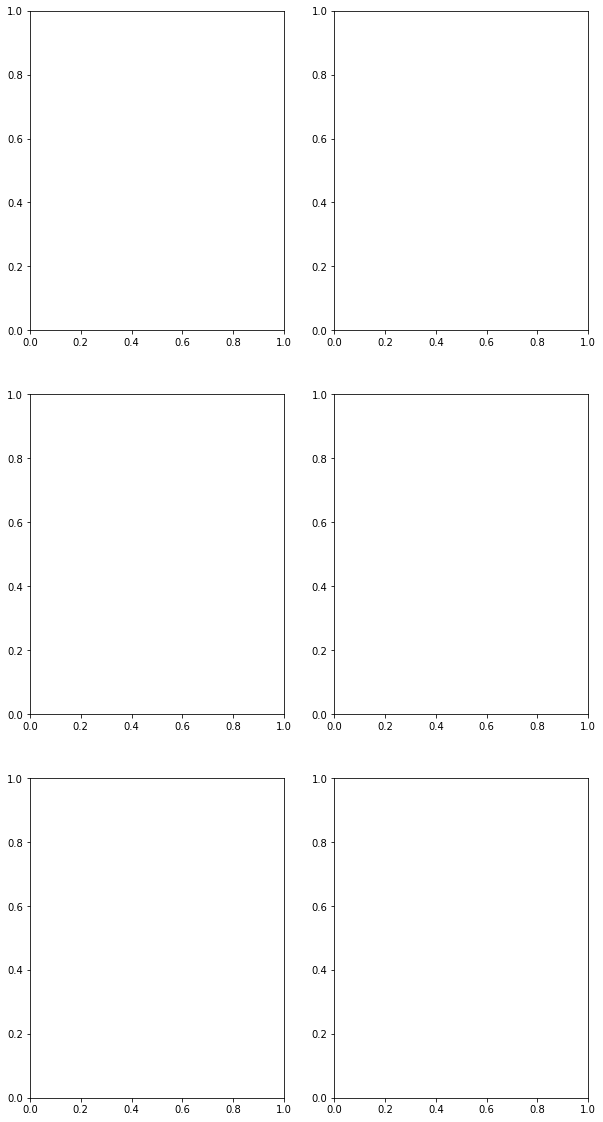

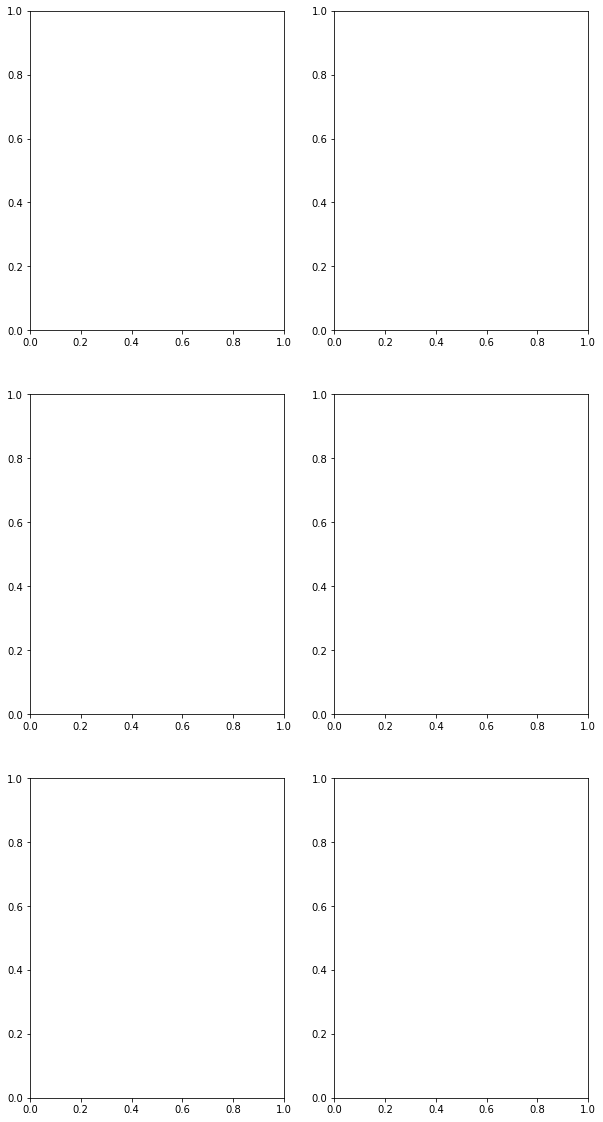

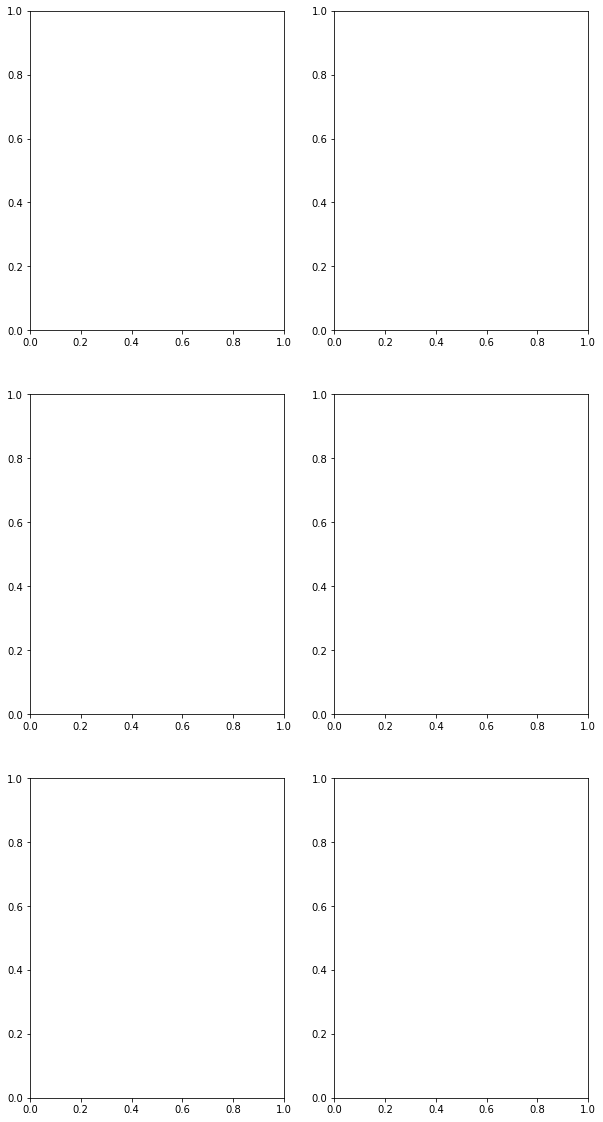

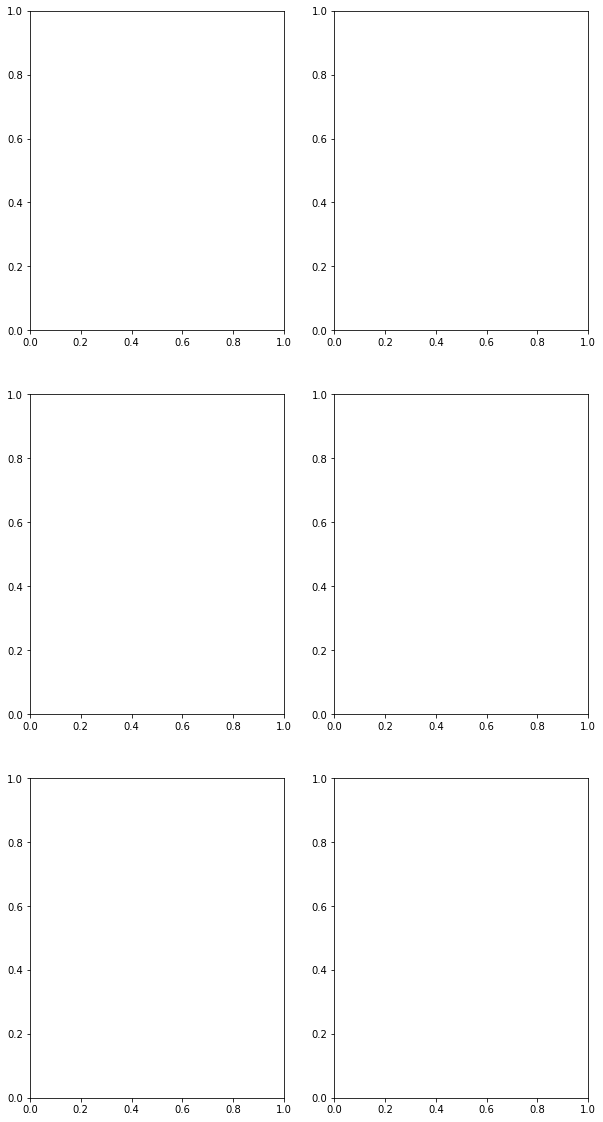

In [7]:
methods = ['lgb','LSTM','VAR','Kernel_RBF']

res_regre = []

for meth in methods:

    _, Val_pred, _ = pred_regression_methods(Data,dataset['data'],
                                    N_test=N_pred,
                                    method = meth,
                                    N_val = 10,
                                    pred_meth = 'rolling',
                                    p = 2,
                                    plot=False)
    res_regre.append(Val_pred)

In [ ]:
from regain.hmm.utils_pred import reg_pred_HMM_GMM
_,_, Val_Pred = reg_pred_HMM_GMM(dataset['data'],
                       Data,
                       [0,5,10,15,28,35,50],
                       [N_states],
                       N_retrain = 10,
                       p=2,
                       N_test = N_pred,
                       meth = 'viterbi',
                       pred_meth = 'rolling',
                       recrossval = False)
res_regre.append(Val_Pred)
methods.append('HHM_GGM2')

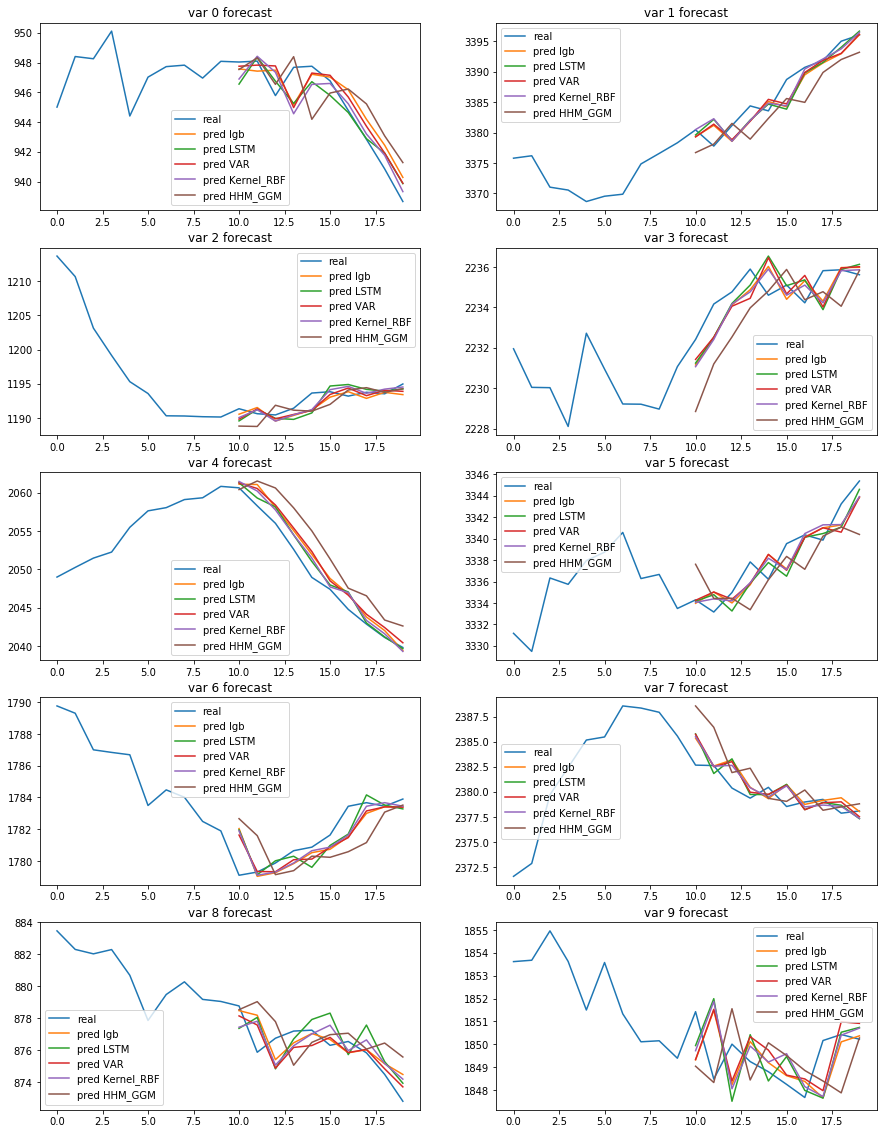

In [13]:
figsizex=15
figsizey=20
N_per_rows=2
N_mem = 10
N_test = N_pred
Dates = None
columns = None
N_TS = np.size(Data, axis=1)

N_rows = int(np.ceil(N_TS / N_per_rows))
f, axes = plt.subplots(N_rows, N_per_rows, figsize=(figsizex, figsizey))

for ts in range(N_TS):
    i = int(ts / N_per_rows)
    j = np.remainder(ts, N_per_rows)
    
    for n,Value_pred in enumerate(res_regre):

        if Dates is None:
            x_mem = np.arange(N_mem + N_test)
            x = np.arange(N_mem,N_mem + N_test)
            if n==0:
                axes[i, j].plot(x_mem, Data[-(N_mem+N_test):,ts],label='real')
                #axes[i, j].plot(x, Data[-(N_test):,ts], 'o', label='real')
            axes[i, j].plot(x, Value_pred[:,ts],  label='pred '+str(methods[n]))
            if columns is None:
                axes[i, j].set_title('var ' + str(ts) + ' forecast')
            else:
                axes[i, j].set_title(str(columns[ts]) + ' forecast')

        axes[i, j].legend()

In [20]:
# CV hmm_gmm 

hmm_gmm = HMM_GraphicalLasso(alpha=25,
                             n_clusters=N_states,
                             verbose=False,
                             mode='scaled',
                             warm_restart=True,
                             repetitions=5,
                             n_jobs=-1)

hmm_gmm.fit(dataset['data'])

print(hmm_gmm.lambdas)

print(results_recap(dataset['states'],hmm_gmm.labels_,dataset['thetas'],hmm_gmm.precisions_))

[0.13424959 0.12673471 0.18566999 3.22796054 0.05272872]
{'homogeneity [0, 1]': 0.8670663420099415, 'completeness [0, 1]': 0.9145452842851869, 'v_measure [0, 1]': 0.8901731696672721, 'adjusted_mutual_info [0, 1]': 0.8894790359814645, 'weighted_mean_mcc [-1, 1]': (0.485164613052282,), 'max_cluster_mean_mcc[-1,1]': (0.508966424242636,), 'weighted_mean_f1 [0, 1]': (0.543169672020227,), 'max_cluster_mean_f1[0,1]': (0.5533272837265578,), 'probabilities_clusters': (array([[0.01092896, 0.98492462, 0.        , 0.        , 0.        ],
       [0.2295082 , 0.01005025, 0.0075188 , 0.        , 0.0041841 ],
       [0.00546448, 0.00502513, 0.98496241, 0.        , 0.        ],
       [0.7431694 , 0.        , 0.0075188 , 0.        , 0.0041841 ],
       [0.01092896, 0.        , 0.        , 1.        , 0.9916318 ]]),), 'max_probabilities_couples': ['Couple: (4, 3), Probability: 1.0, MCC: 0.4638062947716077, F1_score: 0.33333333333333337', 'Couple: (4, 4), Probability: 0.9916317991631799, MCC: 0.44082515

In [21]:
from regain.hmm.utils_pred import pred_HMM_GMM
returns = pred_HMM_GMM(dataset['data'],
                       Data,
                       [28],
                       [N_states],
                       N_retrain = 10,
                       N_test = N_pred,
                       meth = 'viterbi',
                       pred_meth = 'rolling',
                       recrossval = False)

100%|██████████| 1/1 [00:46<00:00, 46.93s/it]


IndexError: index 1000 is out of bounds for axis 0 with size 1000

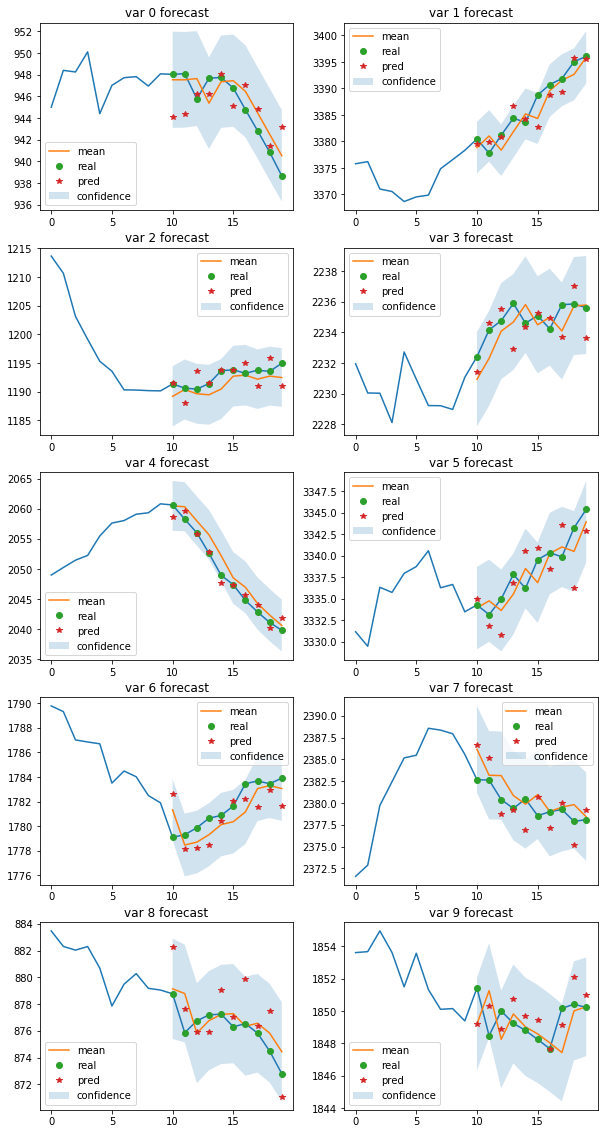

In [23]:
from regain.hmm.utils_pred import pred_from_N_past_days
res = pred_from_N_past_days(dataset['data'],Data,N_past_days=50,N_test=N_pred,pred_meth = 'rolling')

In [24]:
Value, Value_mean = Value_from_returns(Data, returns,N_pred, pred_meth='rolling', perc_var=False)

In [25]:
Value_res, Value_mean_res = Value_from_returns(Data, res,N_pred, pred_meth='rolling', perc_var=False)

In [26]:
res_regre.append(Value)
res_regre.append(Value_mean)
res_regre.append(Value_res)
res_regre.append(Value_mean_res)

In [27]:
methods.append('HMM-GMM')
methods.append('HMM-GMM mean')
methods.append('Last 50 days')
methods.append('Last 50 days mean')

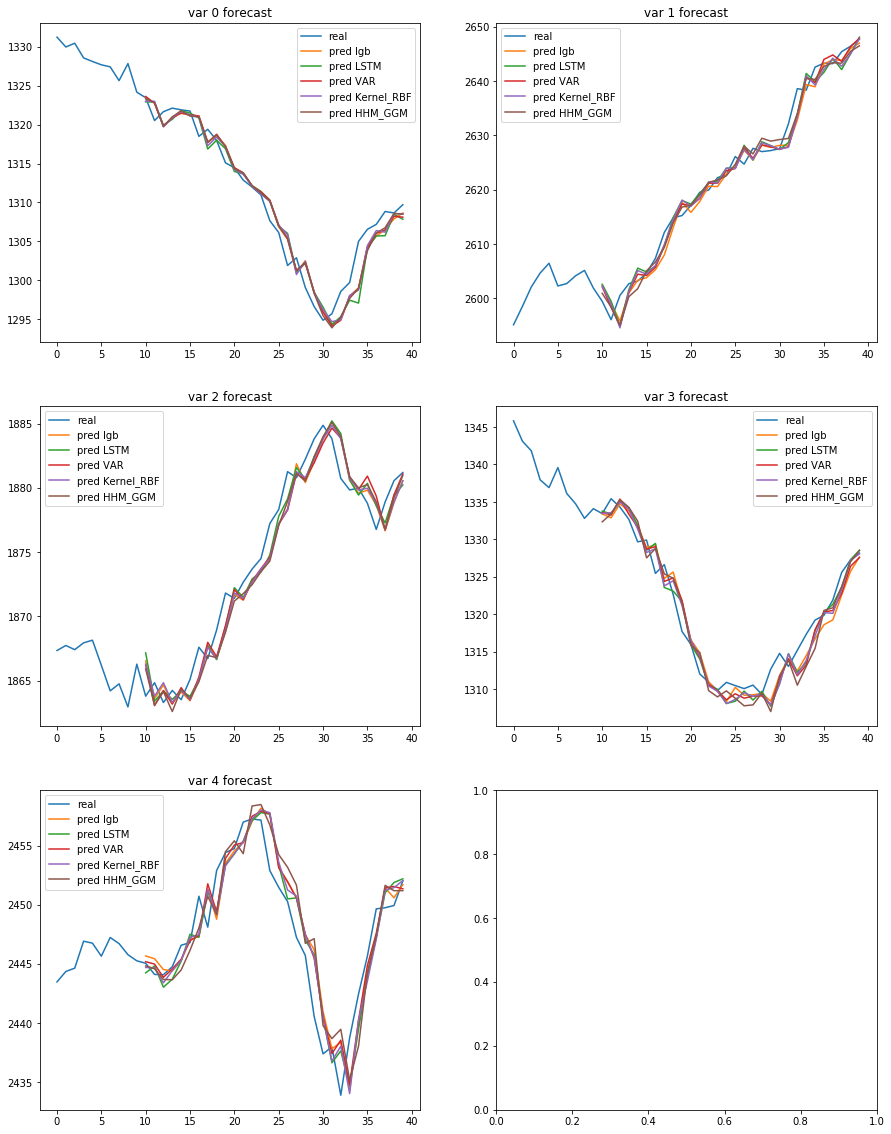

In [9]:
figsizex=15
figsizey=20
N_per_rows=2
N_mem = 10
N_test = N_pred
Dates = None
columns = None
N_TS = np.size(Data, axis=1)

N_rows = int(np.ceil(N_TS / N_per_rows))
f, axes = plt.subplots(N_rows, N_per_rows, figsize=(figsizex, figsizey))
list_all = []
for ts in range(N_TS):
    i = int(ts / N_per_rows)
    j = np.remainder(ts, N_per_rows)
    
    for n,Value_pred in enumerate(res_regre):
        
        absolute_error = abs(Data[-(N_test):,ts]-Value_pred[:,ts])
        MAE = np.mean(absolute_error)
        std = np.std(absolute_error)
        

        if Dates is None:
            x_mem = np.arange(N_mem + N_test)
            x = np.arange(N_mem,N_mem + N_test)
            if n==0:
                axes[i, j].plot(x_mem, Data[-(N_mem+N_test):,ts],label='real')
                #axes[i, j].plot(x, Data[-(N_test):,ts], 'o', label='real')
            axes[i, j].plot(x, Value_pred[:,ts],  label='pred '+str(methods[n]))
            if columns is None:
                axes[i, j].set_title('var ' + str(ts) + ' forecast')
                list_all.append([str(methods[n]),'var ' + str(ts),MAE,std])
            else:
                axes[i, j].set_title(str(columns[ts]) + ' forecast')
                list_all.append([str(methods[n]),str(columns[ts]),MAE,std])

        axes[i, j].legend()

In [10]:
import pandas as pd
df_recap = pd.DataFrame(list_all, columns=['method', 'TS', 'MAE', 'std AB'])

In [17]:
with open('Pred_K5.pickle', 'wb') as f:
    pkl.dump([dataset,df_recap], f)

In [16]:
df_recap.loc[df_recap['method'] == 'Kernel_RBF']['MAE'].mean()

1.7699760261820665

In [17]:
print(df_recap.to_string())

        method     TS       MAE    std AB
0          lgb  var 0  1.189596  0.732285
1         LSTM  var 0  1.241578  0.709419
2          VAR  var 0  1.127794  0.726024
3   Kernel_RBF  var 0  1.149853  0.670880
4      HHM_GGM  var 0  1.042380  0.767650
5          lgb  var 1  0.801201  0.580086
6         LSTM  var 1  0.782504  0.611004
7          VAR  var 1  0.757336  0.673566
8   Kernel_RBF  var 1  0.750449  0.620817
9      HHM_GGM  var 1  0.763302  0.575794
10         lgb  var 2  1.417680  0.782021
11        LSTM  var 2  1.495600  0.775257
12         VAR  var 2  1.404226  0.815828
13  Kernel_RBF  var 2  1.505719  0.759351
14     HHM_GGM  var 2  1.378624  0.810283
15         lgb  var 3  1.137024  0.865255
16        LSTM  var 3  1.072868  0.865416
17         VAR  var 3  1.157706  0.917624
18  Kernel_RBF  var 3  1.083433  0.869384
19     HHM_GGM  var 3  1.050484  0.862473
20         lgb  var 4  1.297417  0.844556
21        LSTM  var 4  1.188254  0.893718
22         VAR  var 4  1.228525  0

In [22]:
prec_real = {}

for i,k in enumerate(dataset['states'][-N_pred:]):
    prec_real[str(i)] = dataset['thetas'][k]

In [23]:
mcc, f1 = thetas_comparison(prec_real,returns[3])

0.7953949089757174
0.8386278693775346
0.8386278693775346
0.8386278693775346
0.7953949089757174
0.7953949089757174
-0.07354355067681902
0.42947784519366666
0.42947784519366666
1.0


In [24]:
print('mean MCC precision matrix forecast', mcc,'mean F1 precision matrix forecast', f1)

mean MCC precision matrix forecast 0.668748047477027 mean F1 precision matrix  forecast 0.701392360499912


In [25]:
mcc_last, f1_last = thetas_comparison(prec_real,res[3])

0.1091089451179962
0.1091089451179962
0.1322711693170675
0.07142857142857142
0.15537971921347118
0.1959983830200101
-0.20890725544918334
-0.13497638119975428
0.1392715036327889
0.09600307214746387


In [26]:
print('mean MCC precision matrix forecast', mcc_last,'mean F1 precision matrix  forecast', f1_last )

mean MCC precision matrix forecast 0.06646866723464277 mean F1 precision matrix  forecast 0.35151515151515156
